# NEWS POPULARITY PREDICTION:

In [1]:
#importing the necessary librabries
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

### DATA SET INSPECTION AND CLEANING:

In [3]:
df = pd.read_csv('C:\\Users\\Hp\\Desktop\\ML_LAB_2\\train.csv')

In [4]:
df.shape

(29733, 61)

In [5]:
df.head(5)

id                                                url  n_tokens_title  \
0   0  http://mashable.com/2013/03/15/build-arduino-p...             8.0   
1   1   http://mashable.com/2013/09/04/edible-bar-codes/            12.0   
2   2  http://mashable.com/2014/06/20/non-player-char...             7.0   
3   3  http://mashable.com/2014/08/06/food-art-vine-c...             9.0   
4   4  http://mashable.com/2014/12/17/blackberry-clas...            13.0   

   n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             211.0         0.629808               1.0   
1             416.0         0.603535               1.0   
2             229.0         0.638393               1.0   
3             473.0         0.542373               1.0   
4            1097.0         0.505213               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.800000        6.0             3.0       0.0         0.0   
1                  0.663580       22.0             7.0       1.0        16.0   
2                  0.746479        9.0             4.0       1.0         1.0   
3                  0.752809        7.0             0.0       1.0         1.0   
4                  0.676343       10.0             4.0      14.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.606635           8.0                        0.0   
1              5.004808           7.0                        0.0   
2              4.829694           8.0                        0.0   
3              4.634249           7.0                        0.0   
4              4.678213           4.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            0.0                  0.0                     0.0   
1                            1.0                  0.0                     0.0   
2                            0.0                  0.0                     0.0   
3                            0.0                  0.0                     0.0   
4                            1.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   1.0                    0.0       217.0      2300.0   
1                   0.0                    0.0         4.0       768.0   
2                   1.0                    0.0        -1.0      1100.0   
3                   1.0                    0.0        -1.0       447.0   
4                   0.0                    0.0        -1.0      1200.0   

   kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
0  797.714286         0.0    617900.0  115912.500000     0.000000   
1  259.400000         0.0         NaN  169071.428571     0.000000   
2  472.625000      4800.0    843300.0  204837.500000  1575.400000   
3  150.400000         0.0    843300.0  229728.571429     0.000000   
4  299.250000     33100.0    843300.0  381925.000000  2822.635182   

    kw_max_avg   kw_avg_avg  self_reference_min_shares  \
0  5103.042553  2568.648709                     2000.0   
1  3339.790199  2112.665837                      658.0   
2  3562.101631  2589.125480                     4800.0   
3  3504.933802          NaN                        0.0   
4  5418.750000  3668.285640                     1400.0   

   self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  \
0                     2000.0                     2000.00                0.0   
1                    13700.0                     4477.25                0.0   
2                        NaN                     4800.00                0.0   
3                        0.0                        0.00                0.0   
4                     2300.0                     2000.00                0.0   

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0                 0.0                   0.0                  0.0   


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

In [7]:
df.describe()

id  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  29733.000000    29733.000000      29733.000000     29733.000000   
mean   14866.000000       10.403861        545.376652         0.554071   
std     8583.322113        2.122101        471.476136         4.064623   
min        0.000000        2.000000          0.000000         0.000000   
25%     7433.000000        9.000000        245.000000         0.471376   
50%    14866.000000       10.000000        407.000000         0.540000   
75%    22299.000000       12.000000        714.000000         0.609053   
max    29732.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      29733.000000              29733.000000  28921.000000   
mean           1.004238                  0.694586     10.866706   
std            6.039790                  3.768884     11.384882   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.626598      4.000000   
50%            1.000000                  0.691275      7.000000   
75%            1.000000                  0.754545     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  average_token_length  \
count    25200.000000  24326.000000  29146.000000          29733.000000   
mean         3.285397      4.512785      1.263364              4.542961   
std          3.851624      8.335517      4.158469              0.855936   
min          0.000000      0.000000      0.000000              0.000000   
25%          1.000000      1.000000      0.000000              4.477124   
50%          3.000000      1.000000      0.000000              4.663717   
75%          4.000000      4.000000      1.000000              4.854545   
max        116.000000    128.000000     91.000000              8.041534   

       num_keywords  data_channel_is_lifestyle  data_channel_is_entertainment  \
count  29269.000000               29733.000000                   29733.000000   
mean       7.217978                   0.052669                       0.175327   
std        1.912259                   0.223375                       0.380253   
min        1.000000                   0.000000                       0.000000   
25%        6.000000                   0.000000                       0.000000   
50%        7.000000                   0.000000                       0.000000   
75%        9.000000                   0.000000                       0.000000   
max       10.000000                   1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         29733.000000            29733.000000          29733.000000   
mean              0.158275                0.058386              0.185047   
std               0.365005                0.234476              0.388342   
min               0.000000                0.000000              0.000000   
25%               0.000000                0.000000              0.000000   
50%               0.000000                0.000000              0.000000   
75%               0.000000                0.000000              0.000000   
max               1.000000                1.000000              1.000000   

       data_channel_is_world    kw_min_min     kw_max_min    kw_avg_min  \
count           29733.000000  28649.000000   29277.000000  29649.000000   
mean                0.213870     25.835945    1154.769238    311.128475   
std                 0.410043     69.316700    4008.595967    623.943555   
min                 0.000000     -1.000000       0.000000     -1.000000   
25%                 0.000000     -1.000000     444.000000    141.000000   
50%                 0.000000     -1.000000     659.000000    234.000000   
75%                 0.000000      4.000000    1000.000000    355.125000   
max                 1.000000    377.000000  298400.0000

In [8]:
#Missing_values in dataset
for i in df:
    print(round((df[i].isnull().sum())/(df.shape[0])*100,2),i)

0.0 id
0.0 url
0.0 n_tokens_title
0.0 n_tokens_content
0.0 n_unique_tokens
0.0 n_non_stop_words
0.0 n_non_stop_unique_tokens
2.73 num_hrefs
15.25 num_self_hrefs
18.19 num_imgs
1.97 num_videos
0.0 average_token_length
1.56 num_keywords
0.0 data_channel_is_lifestyle
0.0 data_channel_is_entertainment
0.0 data_channel_is_bus
0.0 data_channel_is_socmed
0.0 data_channel_is_tech
0.0 data_channel_is_world
3.65 kw_min_min
1.53 kw_max_min
0.28 kw_avg_min
0.46 kw_min_max
5.1 kw_max_max
0.39 kw_avg_max
1.03 kw_min_avg
2.29 kw_max_avg
3.27 kw_avg_avg
0.96 self_reference_min_shares
5.93 self_reference_max_shares
1.09 self_reference_avg_sharess
3.3 weekday_is_monday
2.53 weekday_is_tuesday
5.23 weekday_is_wednesday
1.01 weekday_is_thursday
2.91 weekday_is_friday
0.31 weekday_is_saturday
5.03 weekday_is_sunday
7.29 is_weekend
0.0 LDA_00
0.0 LDA_01
0.0 LDA_02
0.0 LDA_03
0.0 LDA_04
7.55 global_subjectivity
1.18 global_sentiment_polarity
2.81 global_rate_positive_words
2.99 global_rate_negative_words
1.9

In [9]:
Vars_1_value = []
for i in df:
    if df[i].nunique()==1:
        Vars_1_value.append(i)  

In [10]:
Vars_1_value

[]

##### Handling missing values by replacing them with mean:

In [11]:
missing_data_percent =df.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imp = SimpleImputer(strategy='mean')
df[impute_cols] = imp.fit_transform(df[impute_cols])

In [14]:
import missingno as msno

<AxesSubplot:>

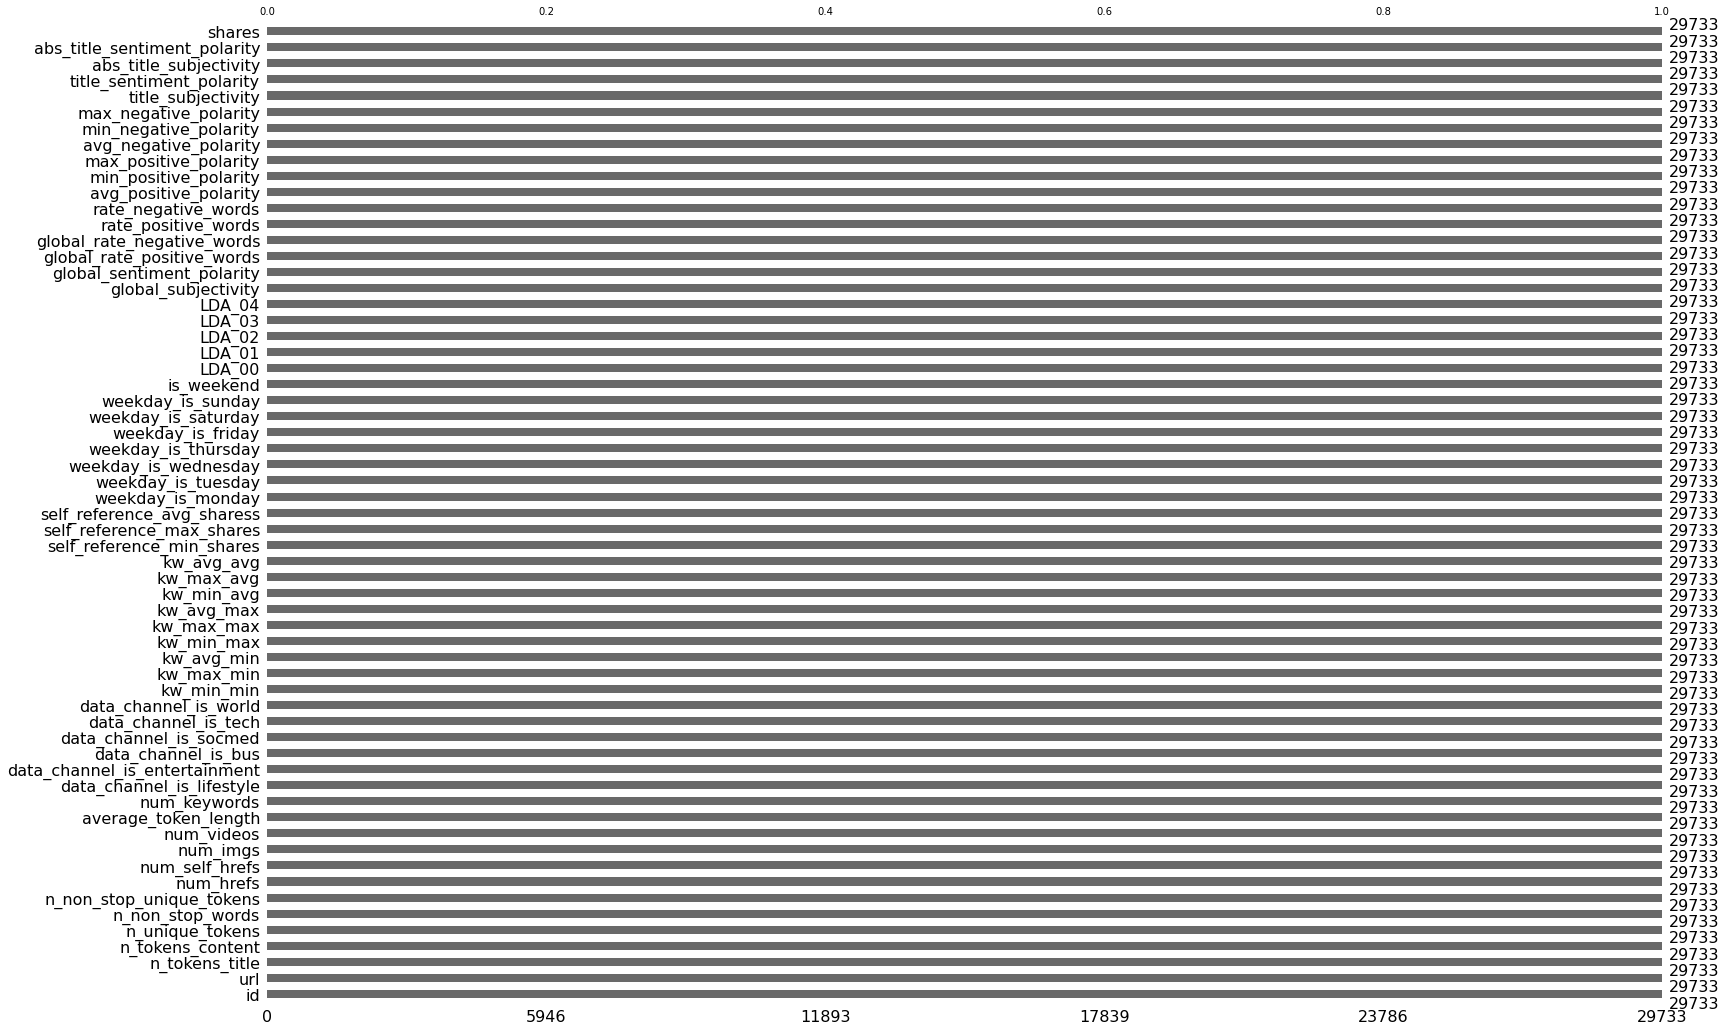

In [15]:
msno.bar(df)

#### UNIVARIATE ANALYSIS USING BOX_PLOTS FOR THE INDEPENDENT FEATURES:

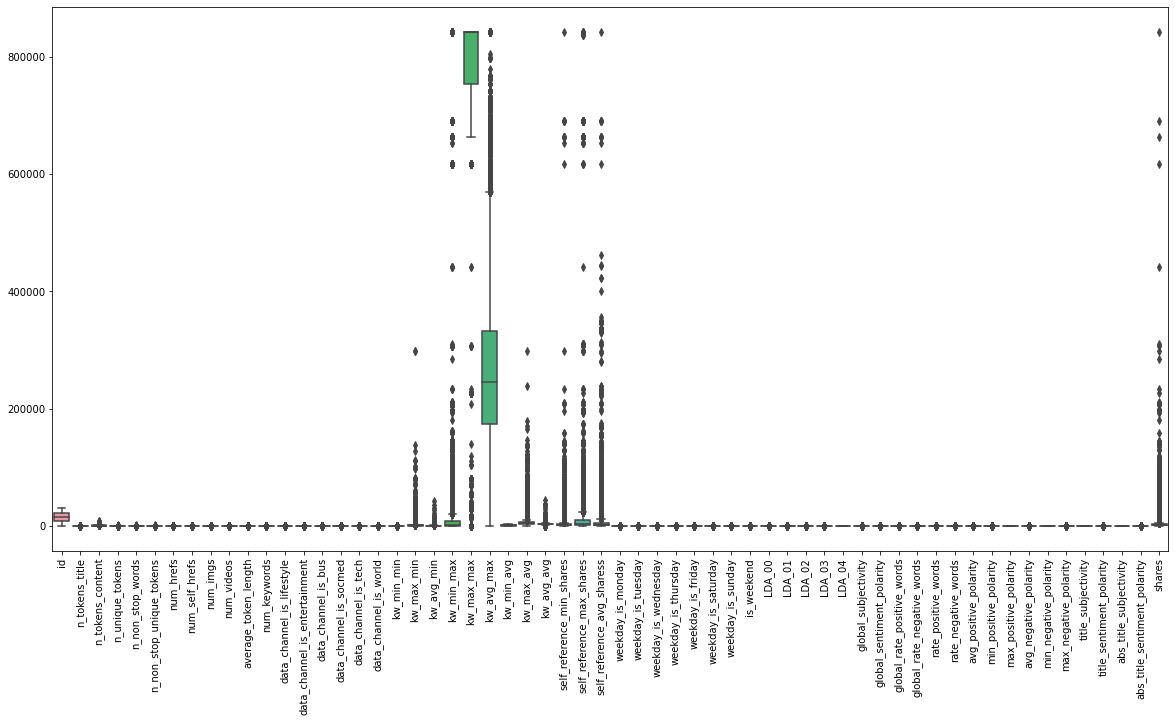

In [22]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data = df)
plt.show()

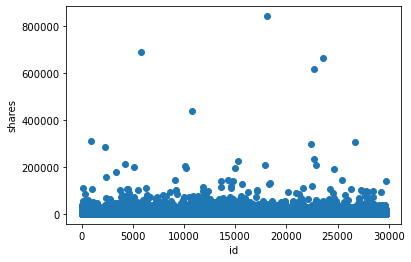

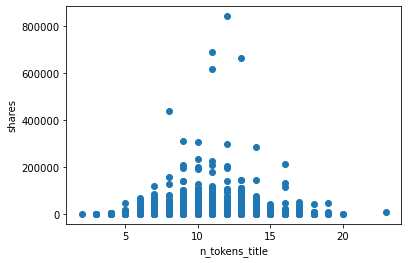

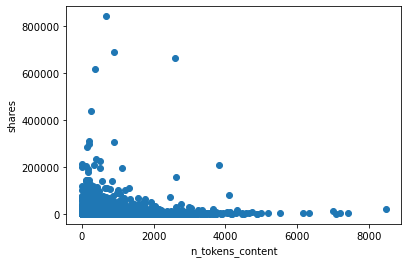

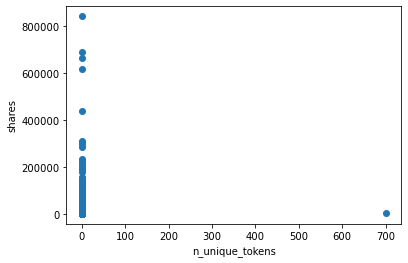

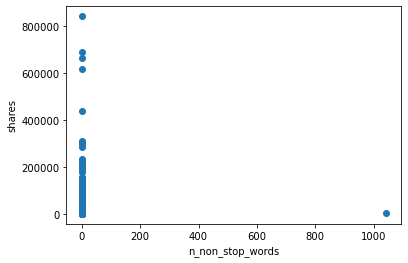

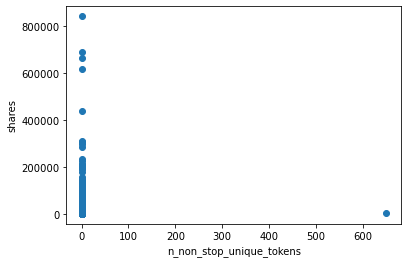

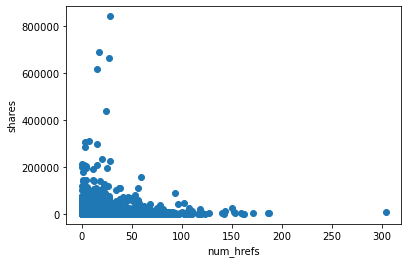

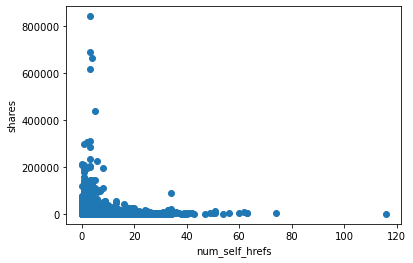

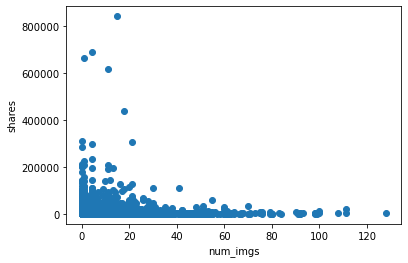

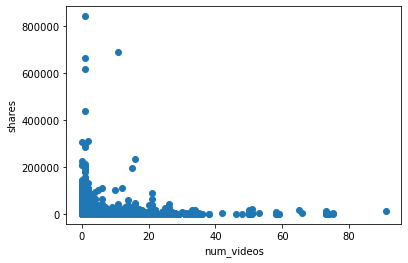

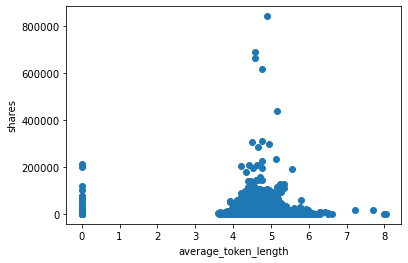

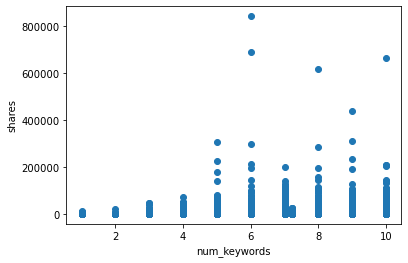

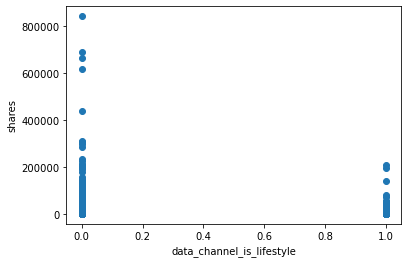

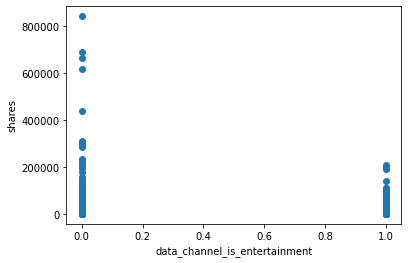

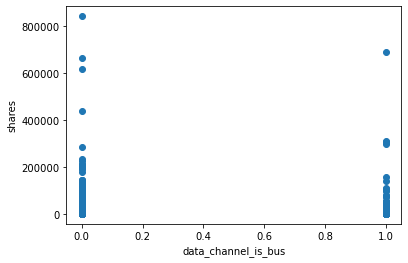

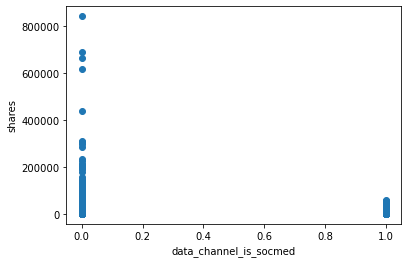

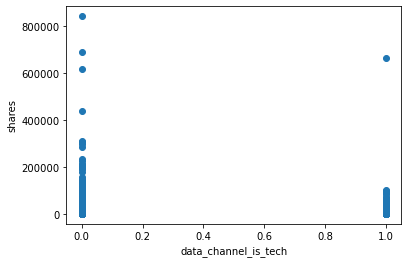

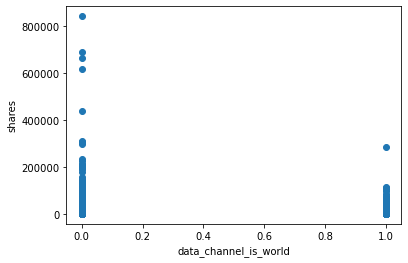

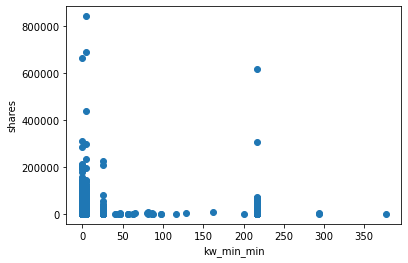

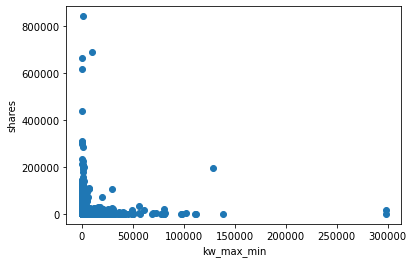

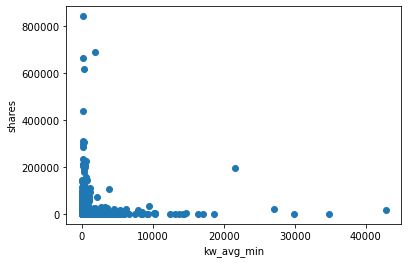

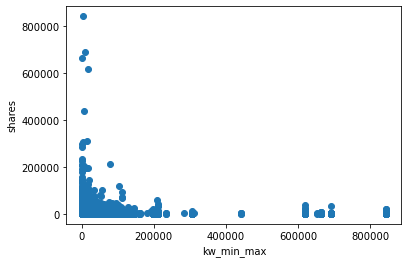

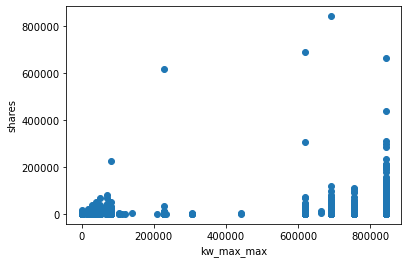

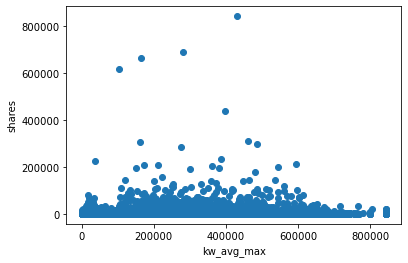

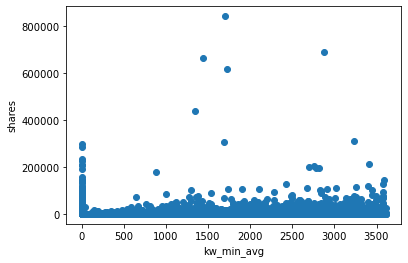

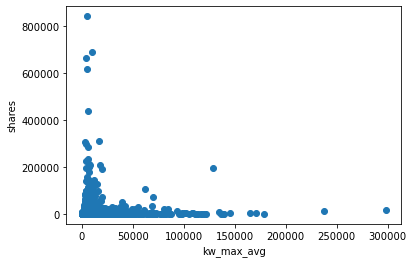

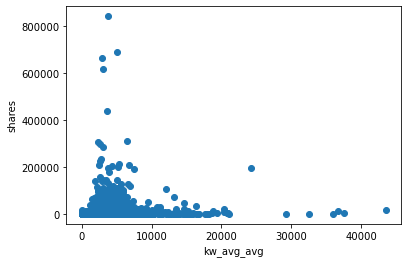

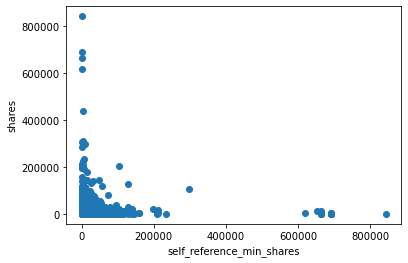

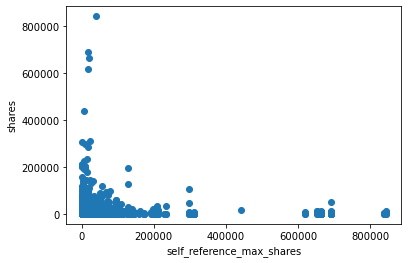

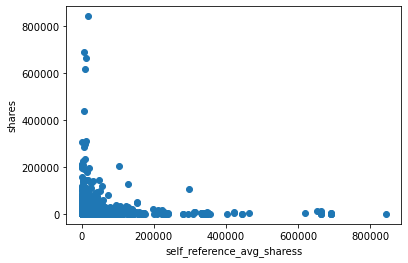

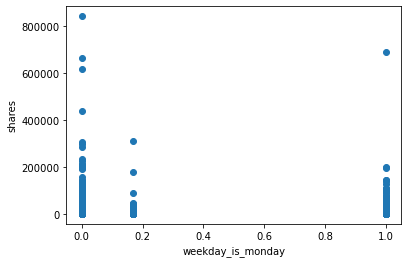

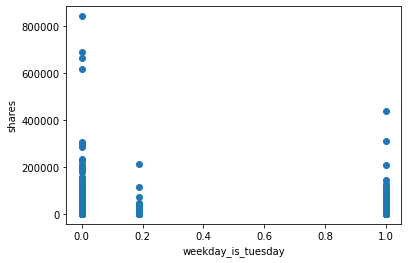

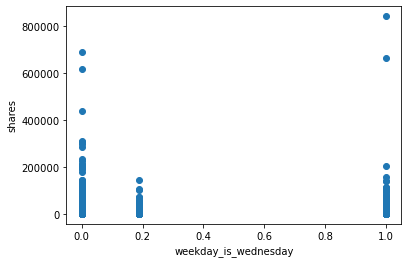

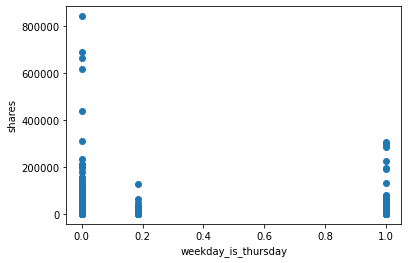

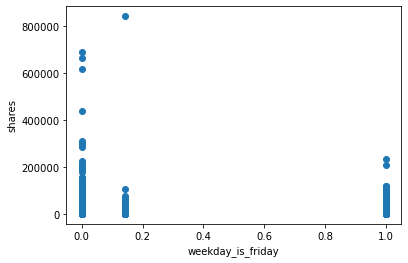

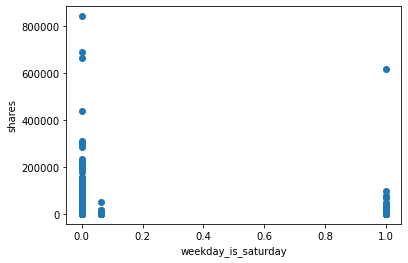

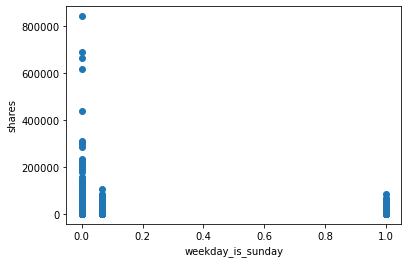

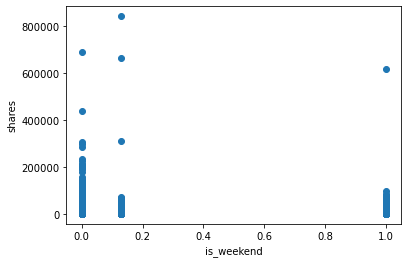

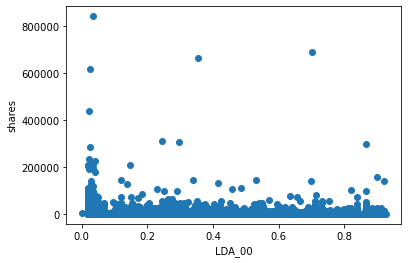

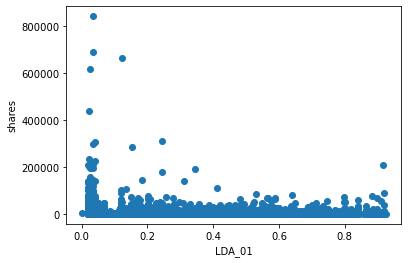

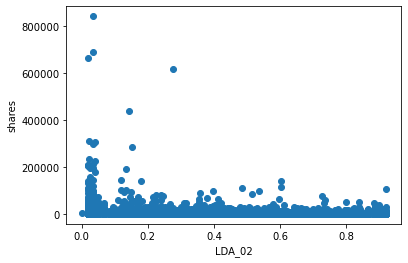

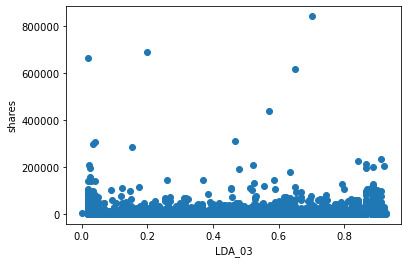

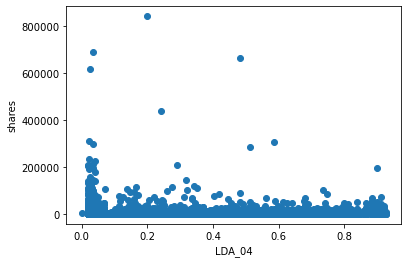

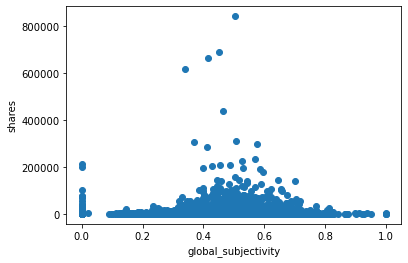

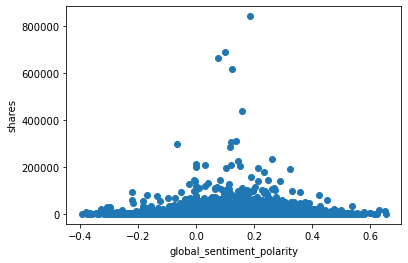

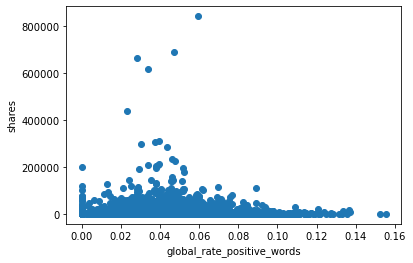

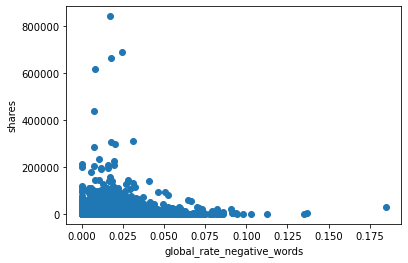

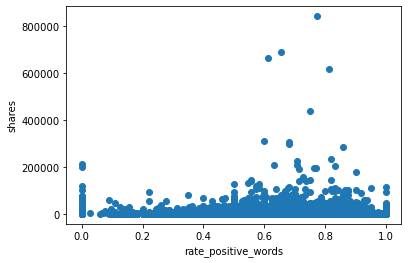

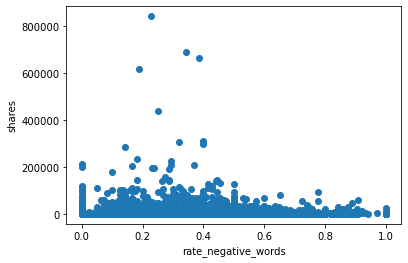

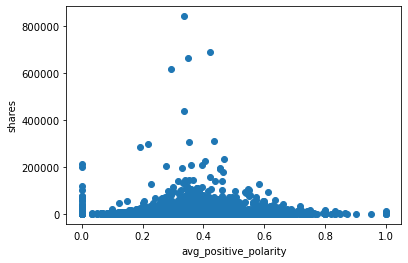

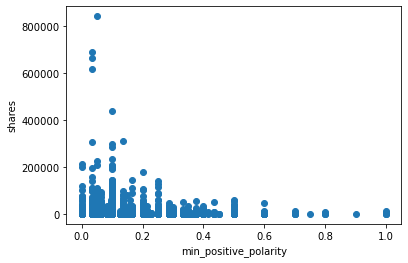

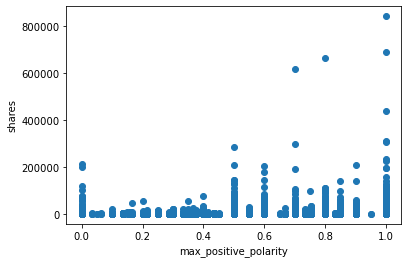

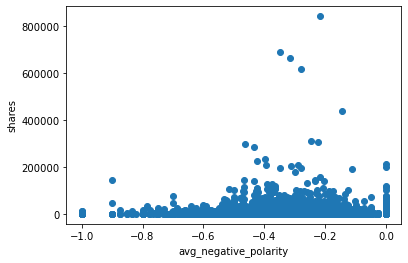

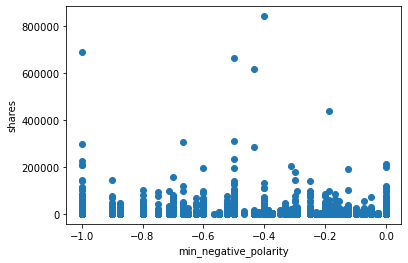

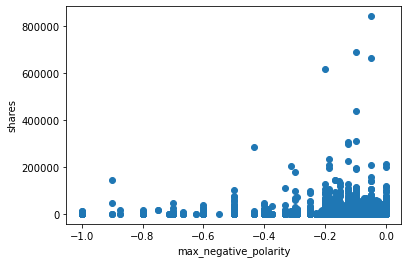

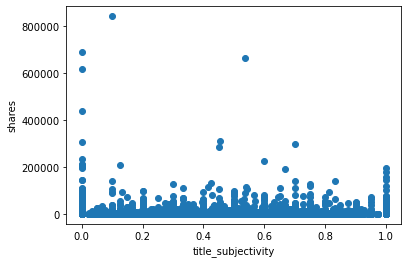

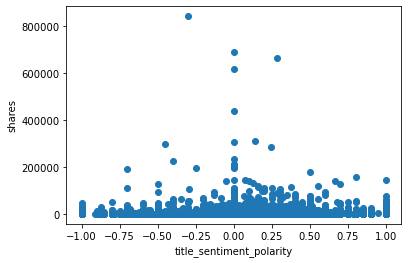

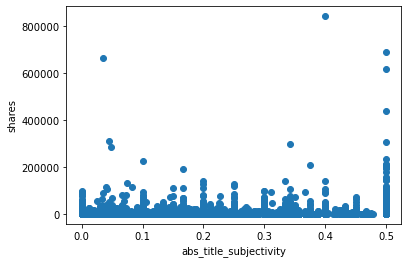

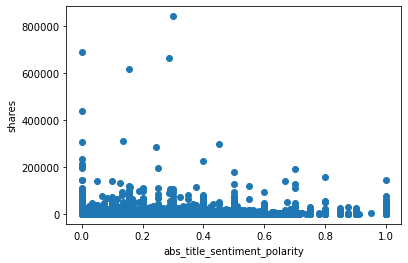

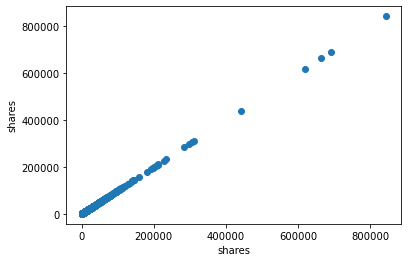

In [296]:
for i in df.drop('url',axis=1):
    plt.scatter(x=df[i],y=df['shares'])
    plt.xlabel(i)
    plt.ylabel('shares')
    plt.show()

In [23]:
#Feature extraction using domain knowledge:
word_features = ['n_tokens_title', 
                 'n_tokens_content', 
                 'n_unique_tokens', 
                 'n_non_stop_words', 
                 'n_non_stop_unique_tokens', 
                 'average_token_length']

media_features = ['num_imgs', 'num_videos']

temporal_features = ['weekday_is_monday', 
                     'weekday_is_tuesday', 
                     'weekday_is_wednesday',
                     'weekday_is_thursday',
                     'weekday_is_friday',
                     'weekday_is_saturday',
                     'weekday_is_sunday',
                     'is_weekend']

channel_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 
                    'data_channel_is_bus', 'data_channel_is_socmed', 
                    'data_channel_is_tech', 'data_channel_is_world']

keyword_features = ['kw_min_min', 'kw_max_min', 'kw_avg_min',
                    'kw_min_max', 'kw_max_max', 'kw_avg_max', 
                    'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
                    'num_keywords']


reference_features = ['num_hrefs',
                      'num_self_hrefs',
                      'self_reference_min_shares',
                      'self_reference_max_shares',
                      'self_reference_avg_sharess']

topic_features = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']

subjectivity_features = ['global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity']

sentiment_features = ['global_sentiment_polarity', 'global_rate_positive_words',
                      'global_rate_negative_words', 'rate_positive_words',
                      'rate_negative_words', 'avg_positive_polarity',
                      'min_positive_polarity', 'max_positive_polarity',
                      'avg_negative_polarity', 'min_negative_polarity',
                      'max_negative_polarity', 'title_sentiment_polarity',
                      'abs_title_sentiment_polarity']

ids = ['id']

others = ['url']

target = ['shares']

In [38]:
selected_features = [*ids, *word_features, *media_features, 
                     *temporal_features, *channel_features, 
                     *keyword_features, *reference_features, 
                     *topic_features, *subjectivity_features, 
                     *sentiment_features]

In [39]:
# Assingign the values to the target_data
X = df[selected_features].set_index('id')
y = df[target]

### SPLITTING THE DATA:

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
X_train.shape

(20813, 58)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20813 entries, 21143 to 19110
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 20813 non-null  float64
 1   n_tokens_content               20813 non-null  float64
 2   n_unique_tokens                20813 non-null  float64
 3   n_non_stop_words               20813 non-null  float64
 4   n_non_stop_unique_tokens       20813 non-null  float64
 5   average_token_length           20813 non-null  float64
 6   num_imgs                       20813 non-null  float64
 7   num_videos                     20813 non-null  float64
 8   weekday_is_monday              20813 non-null  float64
 9   weekday_is_tuesday             20813 non-null  float64
 10  weekday_is_wednesday           20813 non-null  float64
 11  weekday_is_thursday            20813 non-null  float64
 12  weekday_is_friday              20813 non-n

In [46]:
X_train.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    20813.000000      20813.000000     20813.000000      20813.000000   
mean        10.405228        545.751405         0.531033          0.969490   
std          2.125126        475.290447         0.138234          0.171989   
min          2.000000          0.000000         0.000000          0.000000   
25%          9.000000        244.000000         0.471248          1.000000   
50%         10.000000        407.000000         0.540362          1.000000   
75%         12.000000        714.000000         0.609499          1.000000   
max         19.000000       7413.000000         1.000000          1.000000   

       n_non_stop_unique_tokens  average_token_length      num_imgs  \
count              20813.000000          20813.000000  20813.000000   
mean                   0.673347              4.543515      4.481512   
std                    0.155072              0.852305      7.359342   
min                    0.000000              0.000000      0.000000   
25%                    0.626623              4.476240      1.000000   
50%                    0.691489              4.664103      1.000000   
75%                    0.755556              4.854685      4.512785   
max                    1.000000              7.974684    128.000000   

         num_videos  weekday_is_monday  weekday_is_tuesday  \
count  20813.000000       20813.000000        20813.000000   
mean       1.256005           0.169837            0.186788   
std        4.107531           0.369443            0.384775   
min        0.000000           0.000000            0.000000   
25%        0.000000           0.000000            0.000000   
50%        0.000000           0.000000            0.000000   
75%        1.000000           0.000000            0.000000   
max       91.000000           1.000000            1.000000   

       weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
count          20813.000000         20813.000000       20813.000000   
mean               0.185999             0.183430           0.141934   
std                0.378888             0.385112           0.343935   
min                0.000000             0.000000           0.000000   
25%                0.000000             0.000000           0.000000   
50%                0.000000             0.000000           0.000000   
75%                0.000000             0.000000           0.000000   
max                1.000000             1.000000           1.000000   

       weekday_is_saturday  weekday_is_sunday    is_weekend  \
count         20813.000000       20813.000000  20813.000000   
mean              0.061492           0.068571      0.129829   
std               0.239876           0.246344      0.323823   
min               0.000000           0.000000      0.000000   
25%               0.000000           0.000000      0.000000   
50%               0.000000           0.000000      0.000000   
75%               0.000000           0.000000      0.000000   
max               1.000000           1.000000      1.000000   

       data_channel_is_lifestyle  data_channel_is_entertainment  \
count               20813.000000                   20813.000000   
mean                    0.052371                       0.175515   
std                     0.222780                       0.380416   
min                     0.000000                       0.000000   
25%                     0.000000                       0.000000   
50%                     0.000000                       0.000000   
75%                     0.000000                       0.000000   
max                     1.000000                       1.000000   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
count         20813.000000            20813.000000          20813.000000   
mean              0.158891                0.058617              0.187431   
std               0.365583                0.234913              0

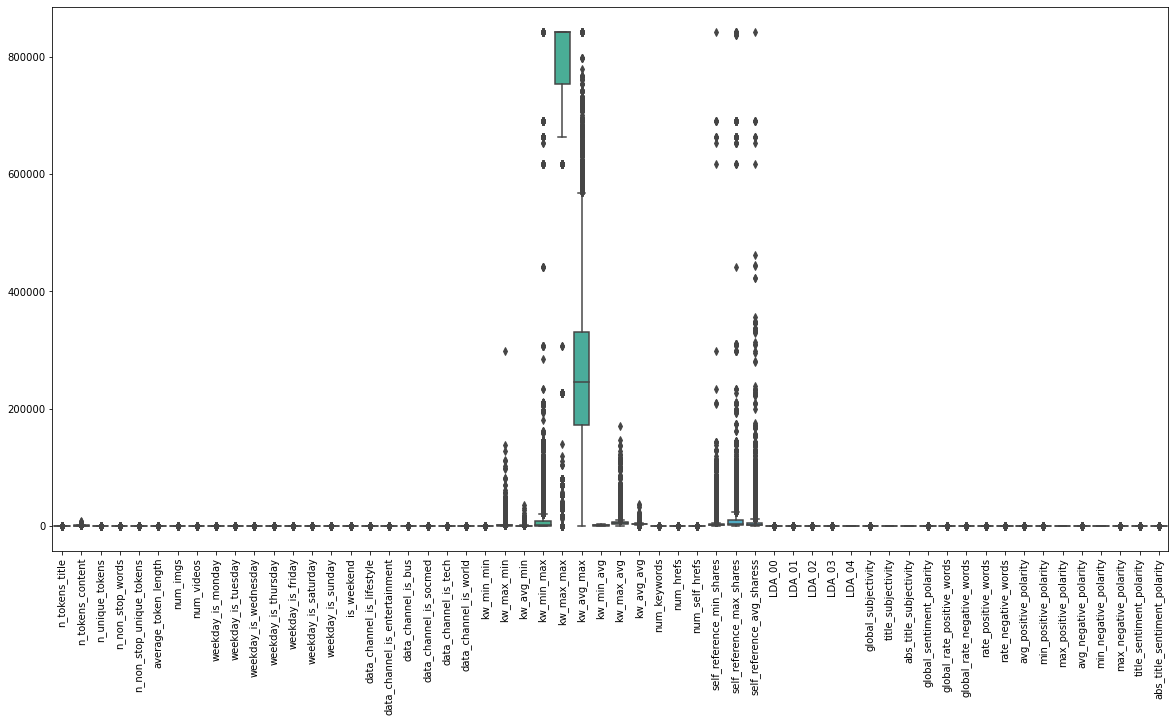

In [47]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data = X_train)
plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
#Scaling the data
scale = StandardScaler()
X_train[:] = scale.fit_transform(X_train)

In [169]:
X_test[:] =scale.transform(X_test)

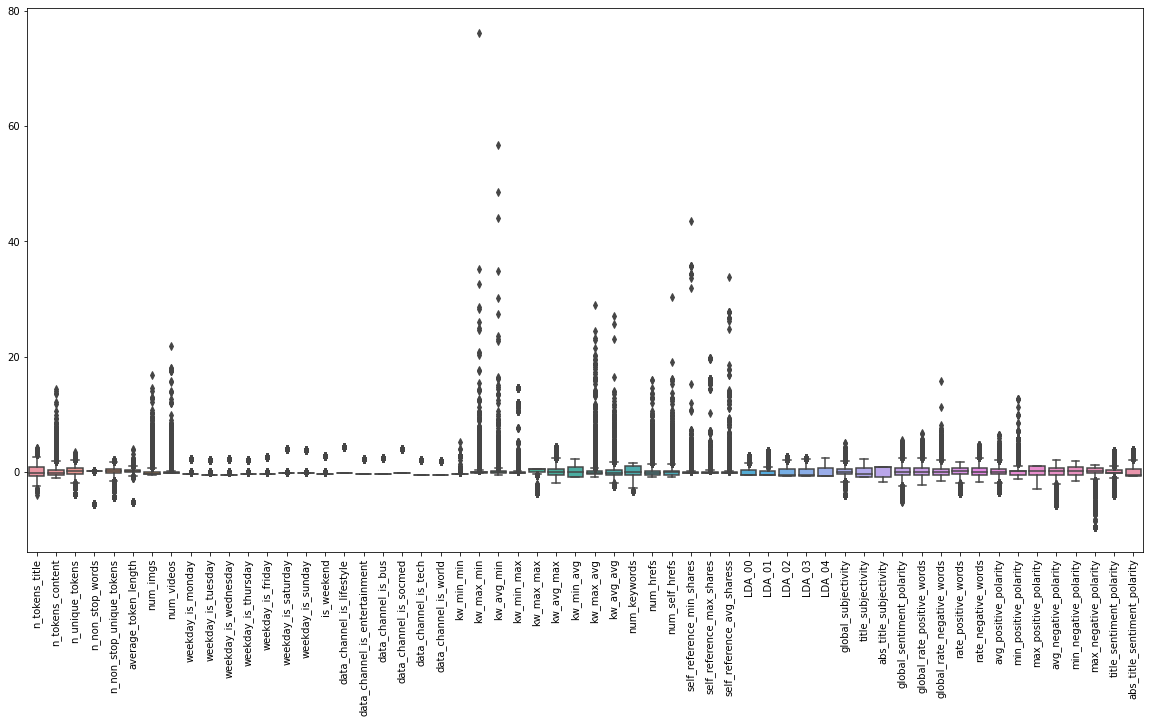

In [50]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data = X_train)
plt.show()

In [51]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [52]:
#Capping the outliers
X_train = X_train.apply(cap_outliers)

In [170]:
X_test = X_test.apply(cap_outliers)

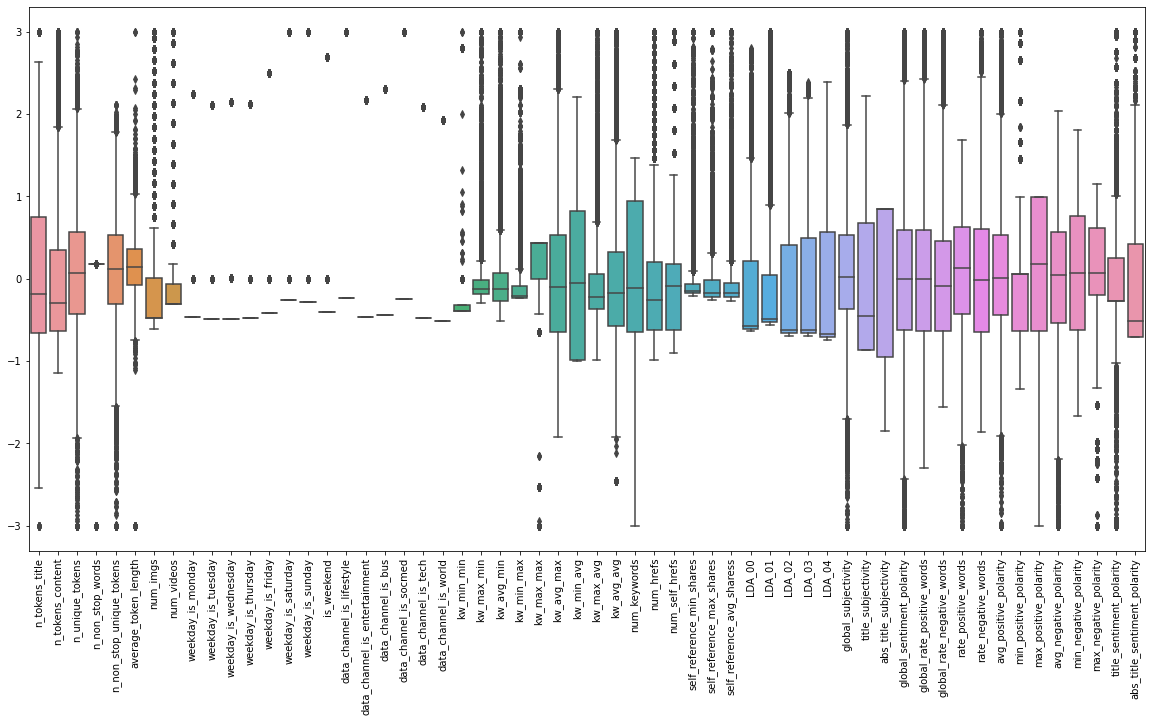

In [53]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data = X_train)
plt.show()

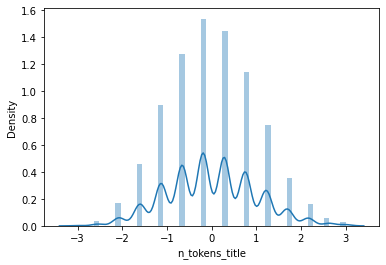

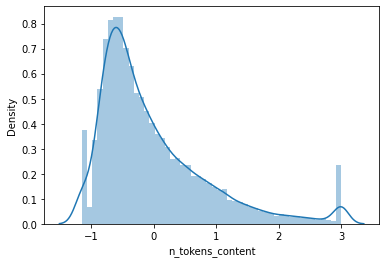

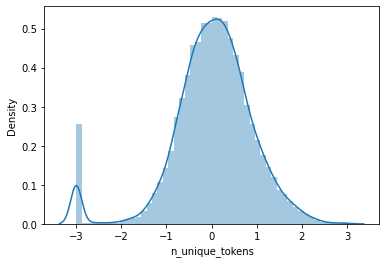

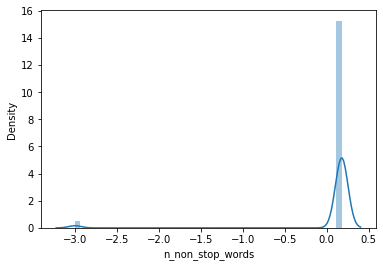

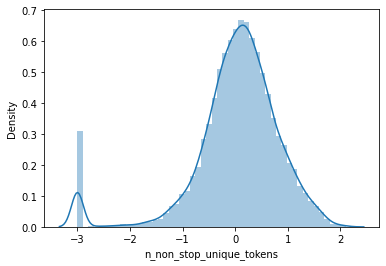

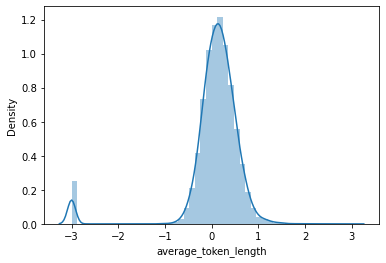

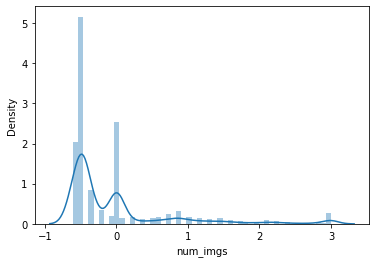

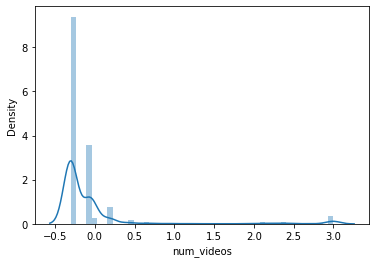

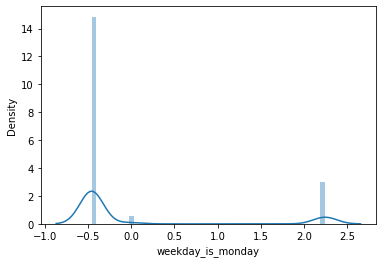

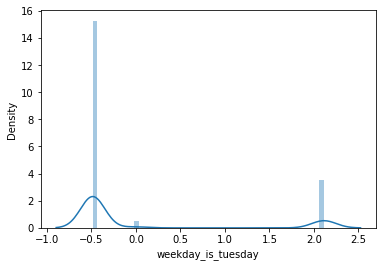

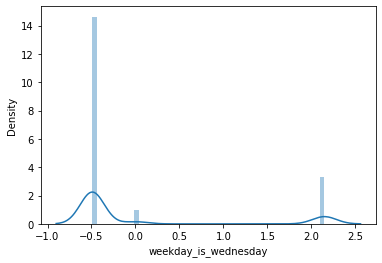

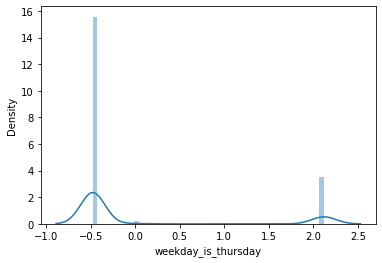

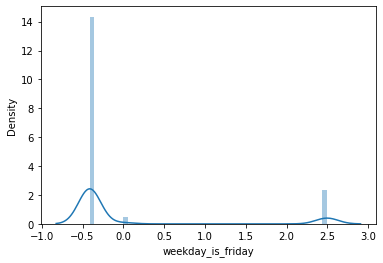

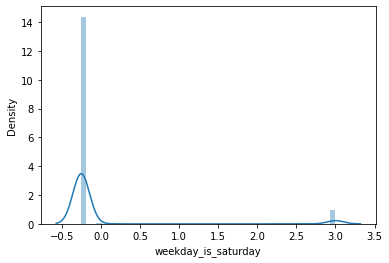

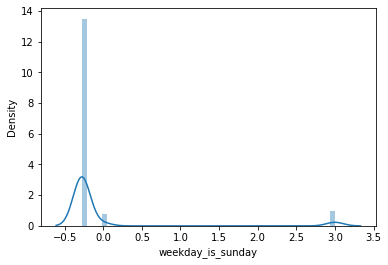

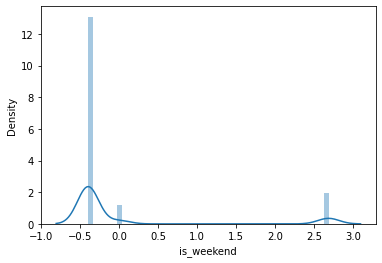

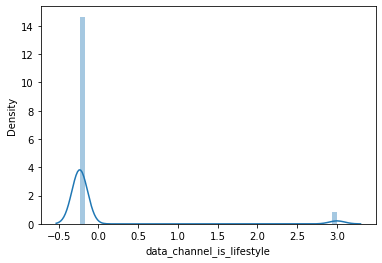

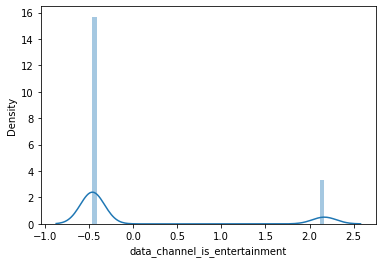

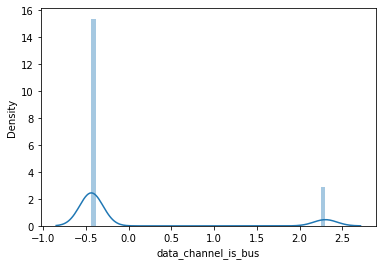

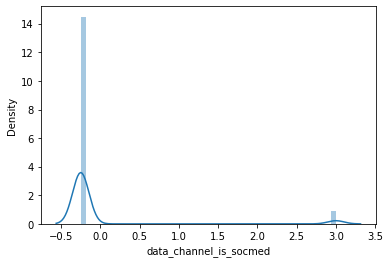

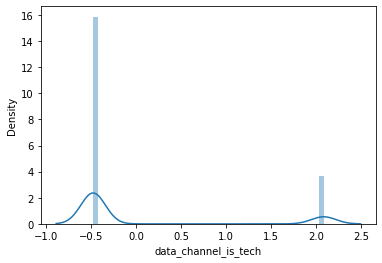

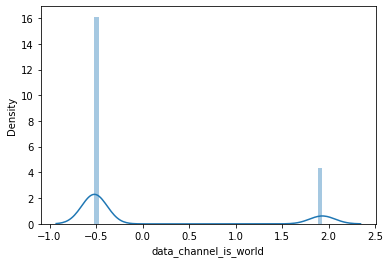

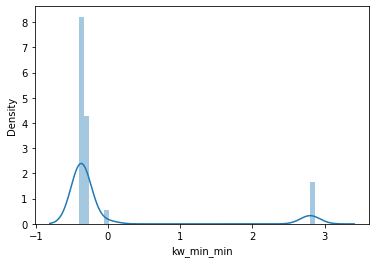

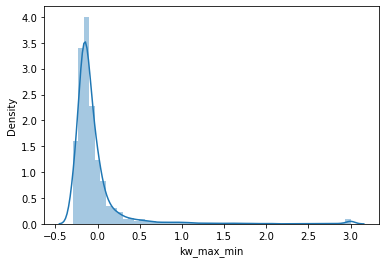

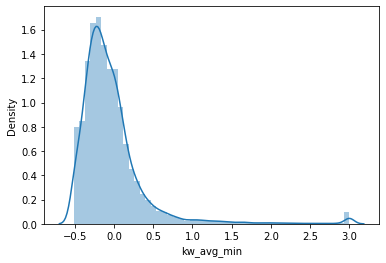

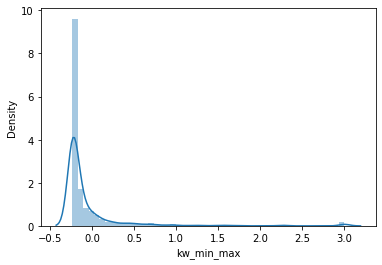

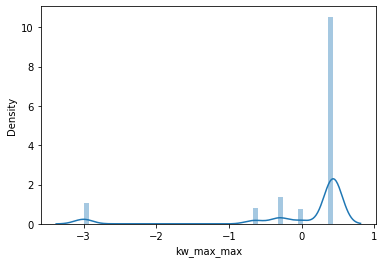

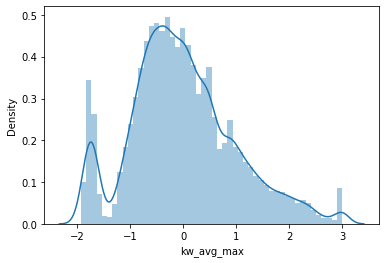

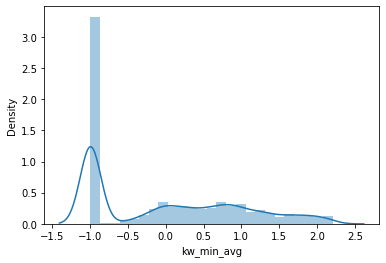

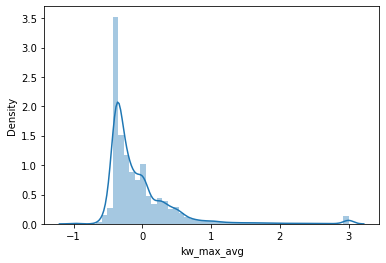

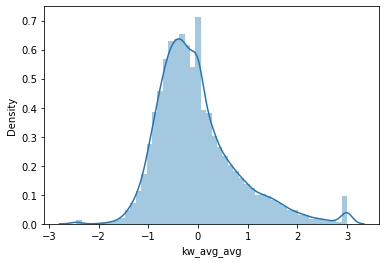

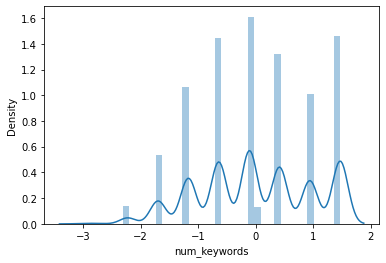

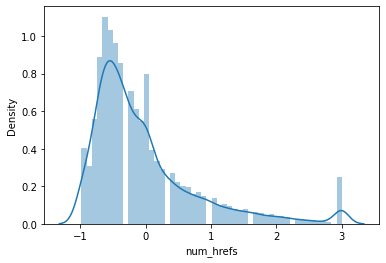

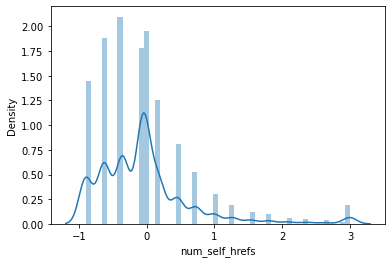

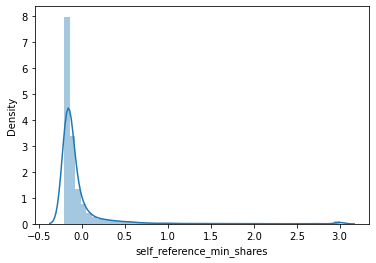

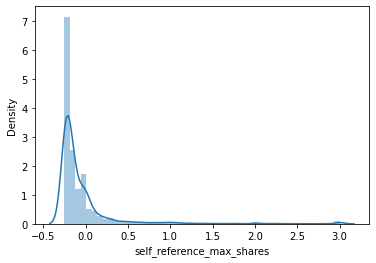

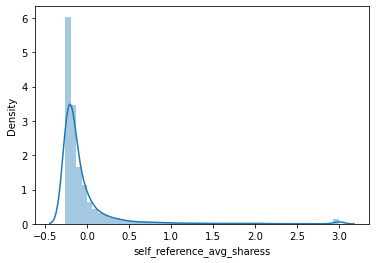

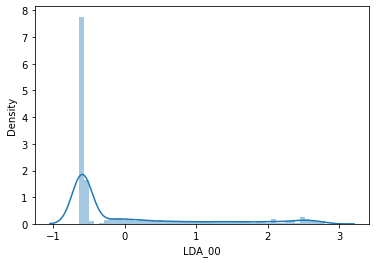

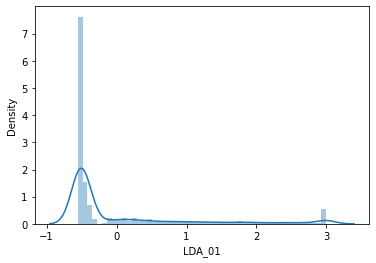

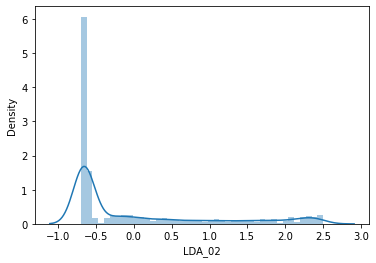

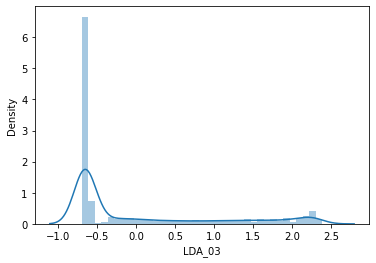

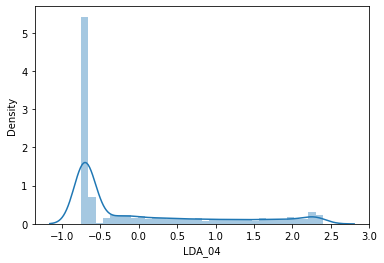

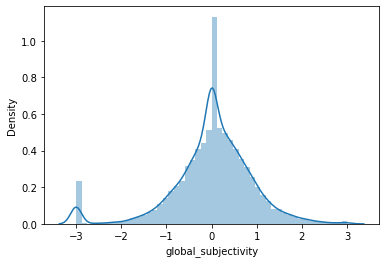

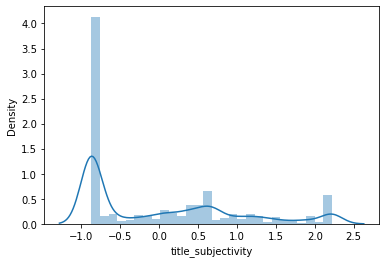

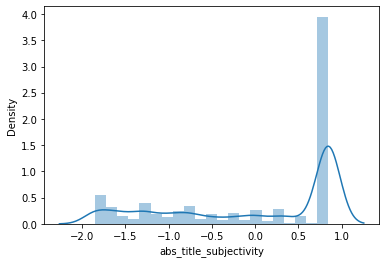

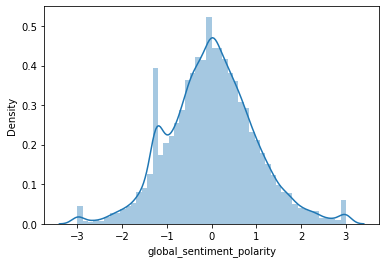

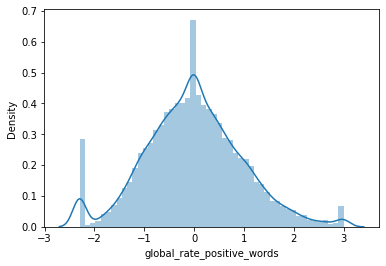

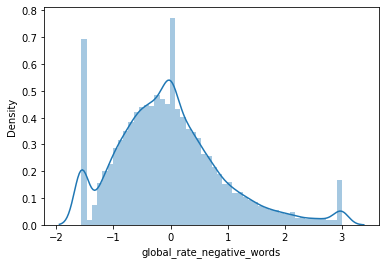

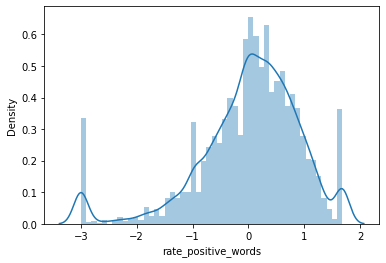

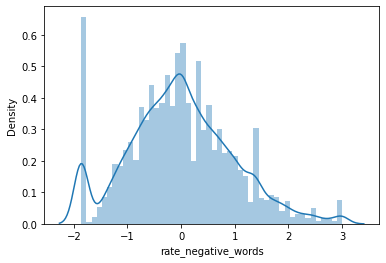

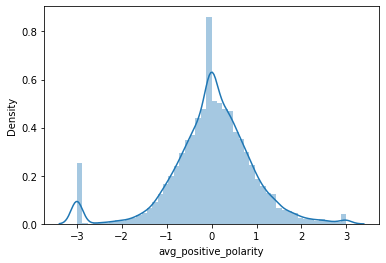

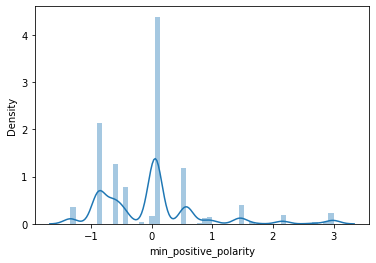

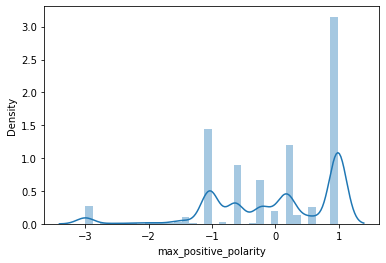

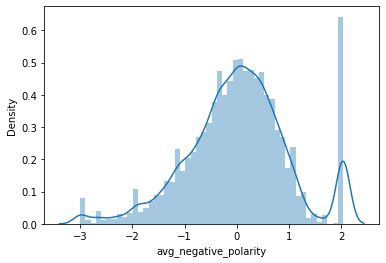

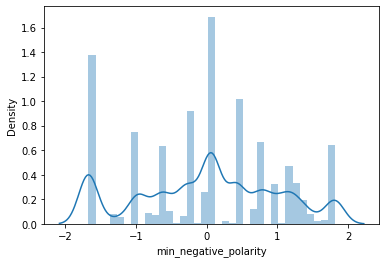

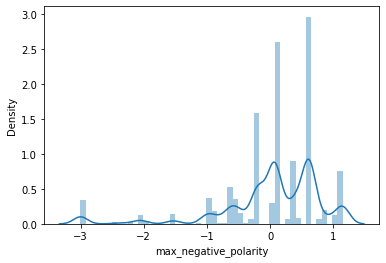

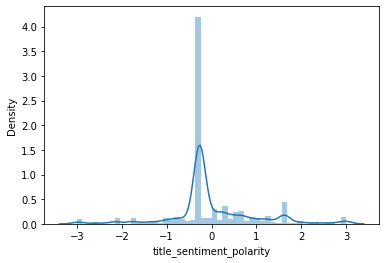

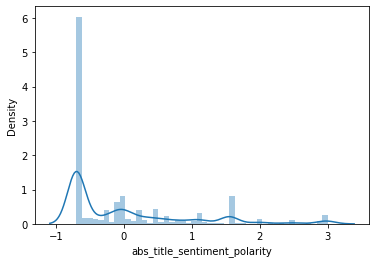

In [54]:
#Distributions of Independent features:
for i in X_train:
    sns.distplot(X_train[i])
    plt.show()

We can observe that the distributions of features are skewed,normal.We can perform transformation on features who have skewed distribution.

#### MUTLIVARIATE ANALYSIS:

In [58]:
cor = X_train.corr()
cor

n_tokens_title  n_tokens_content  \
n_tokens_title                       1.000000          0.017287   
n_tokens_content                     0.017287          1.000000   
n_unique_tokens                     -0.052002         -0.489486   
n_non_stop_words                    -0.042128          0.228116   
n_non_stop_unique_tokens            -0.040953         -0.323276   
average_token_length                -0.085261          0.159103   
num_imgs                            -0.013141          0.289170   
num_videos                           0.058855          0.083776   
weekday_is_monday                    0.001758         -0.000814   
weekday_is_tuesday                   0.013532         -0.016884   
weekday_is_wednesday                 0.006195         -0.017933   
weekday_is_thursday                 -0.017328         -0.001167   
weekday_is_friday                    0.000682         -0.015822   
weekday_is_saturday                 -0.008089          0.037142   
weekday_is_sunday                    0.001879          0.039850   
is_weekend                          -0.002564          0.055232   
data_channel_is_lifestyle           -0.070533          0.038998   
data_channel_is_entertainment        0.135641          0.075152   
data_channel_is_bus                 -0.016917         -0.004261   
data_channel_is_socmed              -0.094519          0.029198   
data_channel_is_tech                -0.048239          0.018668   
data_channel_is_world                0.046837          0.065027   
kw_min_min                          -0.103825         -0.057928   
kw_max_min                          -0.025253          0.015669   
kw_avg_min                          -0.081381          0.005671   
kw_min_max                           0.030144         -0.017282   
kw_max_max                           0.117726          0.065758   
kw_avg_max                           0.119694         -0.099602   
kw_min_avg                           0.006571         -0.018187   
kw_max_avg                          -0.001620         -0.059468   
kw_avg_avg                           0.001568         -0.101964   
num_keywords                        -0.000943          0.076557   
num_hrefs                           -0.060581          0.451927   
num_self_hrefs                      -0.001114          0.305785   
self_reference_min_shares           -0.006959         -0.072334   
self_reference_max_shares            0.010655          0.049187   
self_reference_avg_sharess           0.009543         -0.026195   
LDA_00                              -0.067029          0.036253   
LDA_01                               0.060004         -0.007155   
LDA_02                               0.037286          0.088248   
LDA_03                               0.040330         -0.148741   
LDA_04                              -0.062612          0.037379   
global_subjectivity                 -0.040826          0.114790   
title_subjectivity                   0.078518         -0.001695   
abs_title_subjectivity              -0.144259          0.011920   
global_sentiment_polarity           -0.063501          0.022702   
global_rate_positive_words          -0.051788          0.151556   
global_rate_negative_words           0.014554          0.153257   
rate_positive_words                 -0.061547          0.091041   
rate_negative_words                  0.029159          0.119121   
avg_positive_polarity               -0.040416          0.141862   
min_positive_polarity               -0.024207         -0.302668   
max_positive_polarity               -0.014686          0.454258   
avg_negative_polarity               -0.022610         -0.162101   
min_negative_polarity               -0.036187         -0.480152   
max_negative_polarity                0.017504          0.253909   
title_sentiment_polarity             0.012649          0.014563   
abs_title_sentiment_polarity         0.045120          0.009207   

                               n_unique_tokens  n_non_stop_words  \
n_tokens_

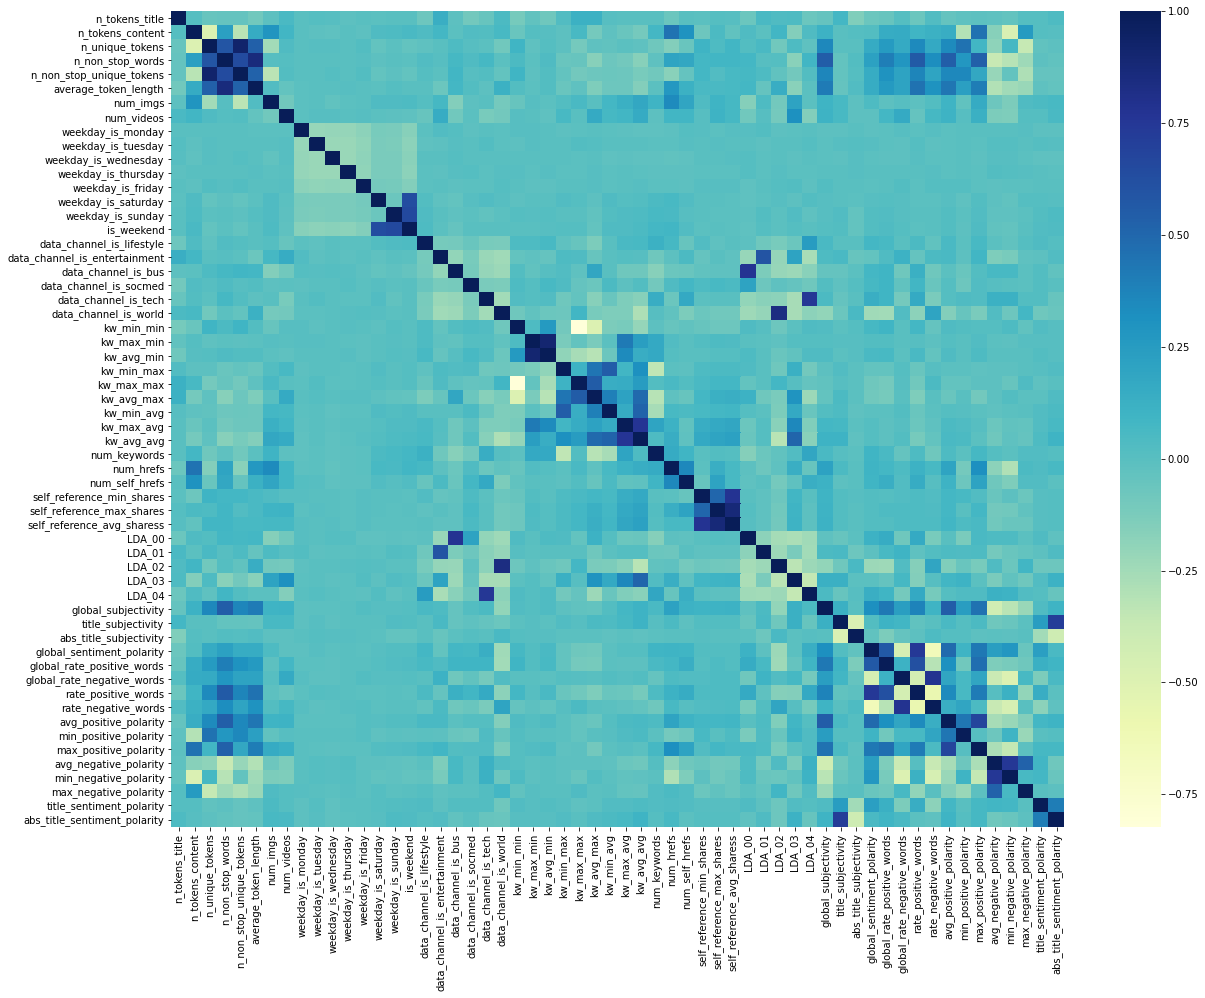

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(cor,cmap="YlGnBu")
plt.show()

we can see that there is some correlation between the independent features.

###  MODEL_SELECTION:

In [74]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge,Lasso

####  USING PCA to reduce the features:

In [71]:
pca = PCA(0.95,random_state=42)
X_train_pca = pca.fit_transform(X_train)

In [171]:
X_test_pca = pca.transform(X_test)

In [73]:
X_train_pca.shape

(20813, 36)

In [127]:
y_train_log = np.log(y_train)

In [304]:
lm = LinearRegression()
lm.fit(X_train_pca,y_train_log)

LinearRegression()

In [305]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

[7.48241782]
[[-0.03521841 -0.00346667  0.08788009  0.06417728  0.00392834 -0.04301385
   0.03185717  0.0641904   0.10754272  0.07325389 -0.00527161 -0.00364829
   0.00783304 -0.03195457  0.01940887  0.03030646 -0.00290917 -0.02443005
   0.07007417  0.01545348 -0.03885774  0.02355576  0.05751785  0.07929462
  -0.01665622 -0.0712941   0.11525012  0.01747893  0.02347874  0.04704378
  -0.03643272 -0.05747451  0.03023886  0.04496603 -0.00215287  0.00747852]]


In [131]:
from sklearn.metrics import r2_score, mean_squared_error

In [306]:
y_pred_train = lm.predict(X_train_pca)

In [307]:
r2_score(y_train_log,y_pred_train)

0.12418110972220286

In [134]:
mean_squared_error(y_train_log,y_pred_train)

0.7663973167320193

In [172]:
y_pred_test = lm.predict(X_test_pca)

In [186]:
r2_score(np.log(y_test),y_pred_test)

0.09572277762515402

In [176]:
mean_squared_error(np.log(y_test),y_pred_test)

0.7702669718465829

In [83]:
from sklearn.model_selection import GridSearchCV

### RIDGE_TRAIL_1:

In [135]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_pca, y_train_log) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [136]:
#Fitting Ridge model for alpha = 1000 and printing coefficients which have been penalised
alpha = 1000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_pca, y_train_log)
print(ridge.coef_)

[[-0.03483367 -0.00342238  0.08654434  0.06300006  0.00384714 -0.04206311
   0.03110576  0.06255148  0.10458127  0.07105168 -0.00507344 -0.00351002
   0.00753231 -0.03072082  0.0186411   0.02900476 -0.00277114 -0.02316278
   0.06600253  0.01449656 -0.03635517  0.02198147  0.05349841  0.07334472
  -0.01536661 -0.06516513  0.10440679  0.01568312  0.02096533  0.04176386
  -0.03204522 -0.05023194  0.02613716  0.03864018 -0.00181734  0.00621918]]


In [137]:
y_pred_train_1 = ridge.predict(X_train_pca)

In [178]:
X_train_pca.shape

(20813, 36)

In [138]:
r2_score(y_train_log,y_pred_train_1)

0.12392107325681645

In [139]:
mean_squared_error(y_train_log,y_pred_train_1)

0.7666248652029839

### LASSO_TRAIL_1:

In [140]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_pca, y_train_log) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [141]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [142]:
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_pca, y_train_log) 

Lasso(alpha=50)

In [143]:
lasso.coef_lasso.coef_

array([-0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.,
       -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.])

In [144]:
y_pred_train_2 = lasso.predict(X_train_pca)

In [145]:
r2_score(y_train_log,y_pred_train_1)

0.12392107325681645

In [146]:
mean_squared_error(y_train_log,y_pred_train_1)

0.7666248652029839

In [182]:
y_pred_test_2 = lasso.predict(X_test_pca)

In [188]:
r2_score((y_test),y_pred_test_2)

-0.0688838966776677

In [190]:
mean_squared_error(np.log(y_test),y_pred_test_2)

0.8519650618060437

###  USING RFECV:

In [100]:
from sklearn.feature_selection import RFECV

In [102]:
lr = LinearRegression()

In [149]:
rfecv = RFECV(estimator=lr, cv=4,scoring='r2')

In [191]:
rfecv.fit(X_train, y_train_log)

RFECV(cv=4, estimator=LinearRegression(), scoring='r2')

In [192]:
rfecv.n_features_

45

In [107]:
from sklearn.feature_selection import RFE

In [193]:
rfe = RFE(estimator=lr, n_features_to_select=45)

In [194]:
rfe.fit(X_train, y_train_log)

RFE(estimator=LinearRegression(), n_features_to_select=45)

In [195]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('n_tokens_title', True, 1),
 ('n_tokens_content', True, 1),
 ('n_unique_tokens', False, 7),
 ('n_non_stop_words', True, 1),
 ('n_non_stop_unique_tokens', True, 1),
 ('average_token_length', True, 1),
 ('num_imgs', True, 1),
 ('num_videos', False, 2),
 ('weekday_is_monday', True, 1),
 ('weekday_is_tuesday', False, 6),
 ('weekday_is_wednesday', False, 5),
 ('weekday_is_thursday', False, 9),
 ('weekday_is_friday', True, 1),
 ('weekday_is_saturday', True, 1),
 ('weekday_is_sunday', True, 1),
 ('is_weekend', True, 1),
 ('data_channel_is_lifestyle', True, 1),
 ('data_channel_is_entertainment', True, 1),
 ('data_channel_is_bus', True, 1),
 ('data_channel_is_socmed', True, 1),
 ('data_channel_is_tech', True, 1),
 ('data_channel_is_world', True, 1),
 ('kw_min_min', True, 1),
 ('kw_max_min', True, 1),
 ('kw_avg_min', True, 1),
 ('kw_min_max', True, 1),
 ('kw_max_max', False, 3),
 ('kw_avg_max', True, 1),
 ('kw_min_avg', True, 1),
 ('kw_max_avg', True, 1),
 ('kw_avg_avg', True, 1),
 ('num_keywo

In [196]:
cols = X_train.columns[rfe.support_]
cols

Index(['n_tokens_title', 'n_tokens_content', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'average_token_length', 'num_imgs',
       'weekday_is_monday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'num_keywords', 'num_hrefs', 'num_self_hrefs',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'title_subjectivity', 'abs_title_subjectivity',
       'global_sentiment_polarity', 'rate_negative_words',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
   

In [197]:
lr_final = LinearRegression()

In [198]:
lr_final.fit(X_train[cols],y_train_log)

LinearRegression()

In [199]:
# Print the coefficients and intercept
print(lr_final.intercept_)
print(lr_final.coef_)

[7.50092956]
[[ 0.01475531  0.02661743  0.02448939 -0.02018147 -0.07387025  0.03258563
   0.02574977  0.03656824  0.05844363  0.04704763  0.04324905 -0.03573258
  -0.05674375 -0.07101217  0.0409003   0.03024812 -0.01878744  0.05411527
  -0.06215144  0.05887903 -0.05254083 -0.02022472 -0.02264872 -0.13774782
   0.3451417   0.02179033  0.05899079 -0.03165948  0.08593134 -0.0260908
   0.17222598  0.12797052  0.01808839  0.03419183  0.07687509  0.05073668
   0.02364042  0.02144008 -0.02066564 -0.01721135 -0.01619482 -0.01375111
  -0.01717713  0.01440241  0.02919828]]


In [310]:
y_train_pred = lr_final.predict(X_train[cols])

In [201]:
r2_score(y_train_log,y_train_pred)

0.13469772552907222

In [202]:
mean_squared_error(y_train_log,y_pred_train)

0.7689448426679636

In [203]:
y_test_pred = lr_final.predict(X_test[cols])

In [204]:
r2_score(np.log(y_test),y_test_pred)

0.12244139235094964

In [205]:
mean_squared_error(np.log(y_test),y_test_pred)

0.7475079484547021

####  VALIDATING THE ASSUMPTIONS:

In [208]:
y_res = y_train_log - y_train_pred

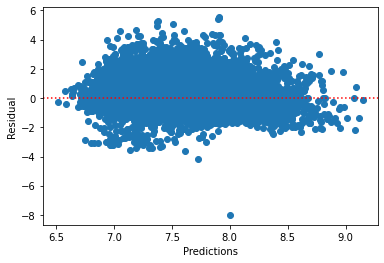

In [209]:
plt.scatter( y_train_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

<AxesSubplot:ylabel='Density'>

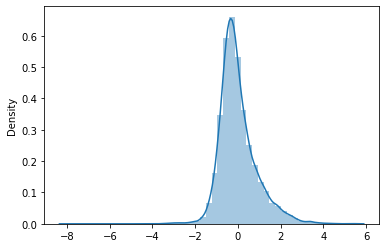

In [210]:
sns.distplot(y_res)

#### RIDGE_TRIAL_2:

In [212]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[cols], y_train_log) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [213]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [214]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[cols], y_train_log)
print(ridge.coef_)

[[ 0.01475531  0.02661743  0.02448939 -0.02018147 -0.07387024  0.03258563
   0.02574977  0.03656824  0.05844362  0.04704763  0.04324905 -0.03573258
  -0.05674375 -0.07101217  0.0409003   0.03024812 -0.01878744  0.05411527
  -0.06215141  0.05887901 -0.05254083 -0.02022472 -0.02264872 -0.1377478
   0.34514167  0.02179033  0.05899079 -0.03165948  0.08593136 -0.02609076
   0.17222594  0.12797051  0.01808839  0.03419183  0.07687509  0.05073668
   0.02364042  0.02144008 -0.02066564 -0.01721135 -0.01619482 -0.01375111
  -0.01717713  0.01440241  0.02919828]]


In [317]:
imp_features = pd.DataFrame({'Imp_features':cols,'value':ridge.coef_[0]})

In [323]:
imp_features.sort_values(by='value',ascending=False).head(10)

Imp_features     value
24                  kw_avg_avg  0.345142
30  self_reference_avg_sharess  0.172226
31                      LDA_00  0.127971
28   self_reference_min_shares  0.085931
34                      LDA_04  0.076875
26                   num_hrefs  0.058991
19                  kw_avg_min  0.058879
8          weekday_is_saturday  0.058444
17                  kw_min_min  0.054115
35         global_subjectivity  0.050737

In [215]:
y_pred_train  = ridge.predict(X_train[cols])

In [216]:
r2_score(y_train_log,y_pred_train)

0.13469772552907233

In [217]:
mean_squared_error(y_train_log,y_pred_train)

0.7571946080156888

In [218]:
y_pred_test  = ridge.predict(X_test[cols])

In [219]:
r2_score(np.log(y_test),y_pred_test)

0.12244139260137377

In [220]:
mean_squared_error(np.log(y_test),y_pred_test)

0.7475079482413898

In [221]:
y_res = y_train_log-y_pred_train

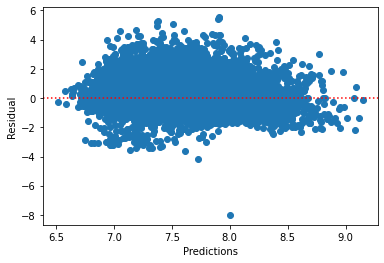

In [222]:
plt.scatter( y_train_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

<AxesSubplot:ylabel='Density'>

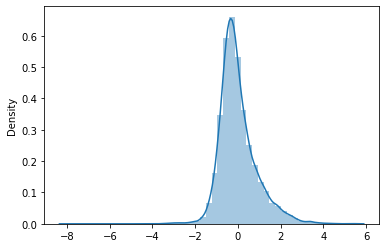

In [223]:
sns.distplot(y_res)

### LASSO_TRAIL_2:

In [229]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train_log) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   15.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [230]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [232]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[cols], y_train_log) 

Lasso(alpha=0.0001)

In [233]:
y_train_pred = lasso.predict(X_train[cols])

In [234]:
r2_score(y_train_log,y_train_pred)

0.13469210869730408

In [235]:
mean_squared_error(y_train_log,y_train_pred)

0.7571995231012659

In [236]:
y_test_pred = lasso.predict(X_test[cols])

In [237]:
r2_score(np.log(y_test),y_test_pred)

0.12238151371202388

In [238]:
mean_squared_error(np.log(y_test),y_test_pred)

0.7475589533199606

### SUBMISSION_FILE_PREP:

In [240]:
df_T = pd.read_csv('C:\\Users\\Hp\\Desktop\\ML_LAB_2\\test.csv')

In [241]:
df_T.shape

(9911, 60)

In [242]:
df_T.head()

id                                                url  n_tokens_title  \
0  29733    http://mashable.com/2014/12/05/2014-cant-unsee/            10.0   
1  29734  http://mashable.com/2014/01/02/twitter-new-yea...            12.0   
2  29735  http://mashable.com/2014/06/11/gopro-value-3-b...            10.0   
3  29736  http://mashable.com/2014/10/08/spanish-ebola-d...            12.0   
4  29737  http://mashable.com/2014/02/09/jennifer-lawren...            11.0   

   n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             564.0         0.505618               1.0   
1            1127.0         0.431298               1.0   
2             400.0         0.564232               1.0   
3             798.0         0.435279               1.0   
4            1010.0         0.464503               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.637394       21.0             1.0       0.0         3.0   
1                  0.621622       10.0             6.0      11.0         0.0   
2                  0.698795        1.0             0.0       1.0         1.0   
3                  0.613054        2.0             2.0       3.0         1.0   
4                  0.611727       32.0             2.0       1.0         0.0   

   average_token_length  num_keywords  data_channel_is_lifestyle  \
0              4.723404           5.0                        0.0   
1              4.360248           8.0                        0.0   
2              4.765000           7.0                        0.0   
3              3.984962           9.0                        0.0   
4              5.180198           8.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            0.0                  0.0                     0.0   
1                            0.0                  0.0                     0.0   
2                            1.0                  0.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    1.0        -1.0       442.0   
1                   1.0                    0.0        -1.0       733.0   
2                   0.0                    0.0        -1.0       784.0   
3                   0.0                    0.0        -1.0       796.0   
4                   0.0                    1.0        -1.0       269.0   

   kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
0  128.000000     23700.0    843300.0  340780.000000  2154.061235   
1  254.875000      6300.0    843300.0  140325.000000  1671.078652   
2  283.285714      6800.0    843300.0  166071.428571  1828.500000   
3  284.222222      1800.0    843300.0  325322.222222  1059.333333   
4   91.714286         0.0    843300.0  214137.500000     0.000000   

    kw_max_avg   kw_avg_avg  self_reference_min_shares  \
0  3702.951220  2994.958581                     2300.0   
1  4040.166667  2704.175559                     3500.0   
2  3575.518291  2645.535689                        0.0   
3  7735.494465  3966.507513                     6300.0   
4  3583.632001  2030.692327                     1500.0   

   self_reference_max_shares  self_reference_avg_sharess  weekday_is_monday  \
0                     2300.0                      2300.0                1.0   
1                     6300.0                      4900.0                0.0   
2                        0.0                         0.0                0.0   
3                     6300.0                      6300.0                0.0   
4                        NaN                      1500.0                0.0   

   weekday_is_tuesday  weekday_is_wednesday  weekday_is_thursday  \
0                 0.0                   0.0          

In [244]:
for i in df_T:
    print(round((df_T[i].isnull().sum())/(df_T.shape[0])*100,2),i)

0.0 id
0.0 url
0.0 n_tokens_title
0.0 n_tokens_content
0.0 n_unique_tokens
0.0 n_non_stop_words
0.0 n_non_stop_unique_tokens
2.76 num_hrefs
16.17 num_self_hrefs
18.75 num_imgs
2.14 num_videos
0.0 average_token_length
1.7 num_keywords
0.0 data_channel_is_lifestyle
0.0 data_channel_is_entertainment
0.0 data_channel_is_bus
0.0 data_channel_is_socmed
0.0 data_channel_is_tech
0.0 data_channel_is_world
3.6 kw_min_min
1.37 kw_max_min
0.27 kw_avg_min
0.32 kw_min_max
5.09 kw_max_max
0.34 kw_avg_max
1.08 kw_min_avg
2.27 kw_max_avg
2.95 kw_avg_avg
1.07 self_reference_min_shares
5.33 self_reference_max_shares
1.03 self_reference_avg_sharess
3.27 weekday_is_monday
2.63 weekday_is_tuesday
4.84 weekday_is_wednesday
1.01 weekday_is_thursday
2.9 weekday_is_friday
0.26 weekday_is_saturday
4.95 weekday_is_sunday
7.09 is_weekend
0.0 LDA_00
0.0 LDA_01
0.0 LDA_02
0.0 LDA_03
0.0 LDA_04
7.59 global_subjectivity
0.99 global_sentiment_polarity
2.75 global_rate_positive_words
3.2 global_rate_negative_words
1.77 

In [247]:
missing_data_percent =df_T.isnull().any()
impute_cols = missing_data_percent[missing_data_percent.gt(0)].index
impute_cols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [248]:
imp = SimpleImputer(strategy='mean')
df_T[impute_cols] = imp.fit_transform(df_T[impute_cols])

<AxesSubplot:>

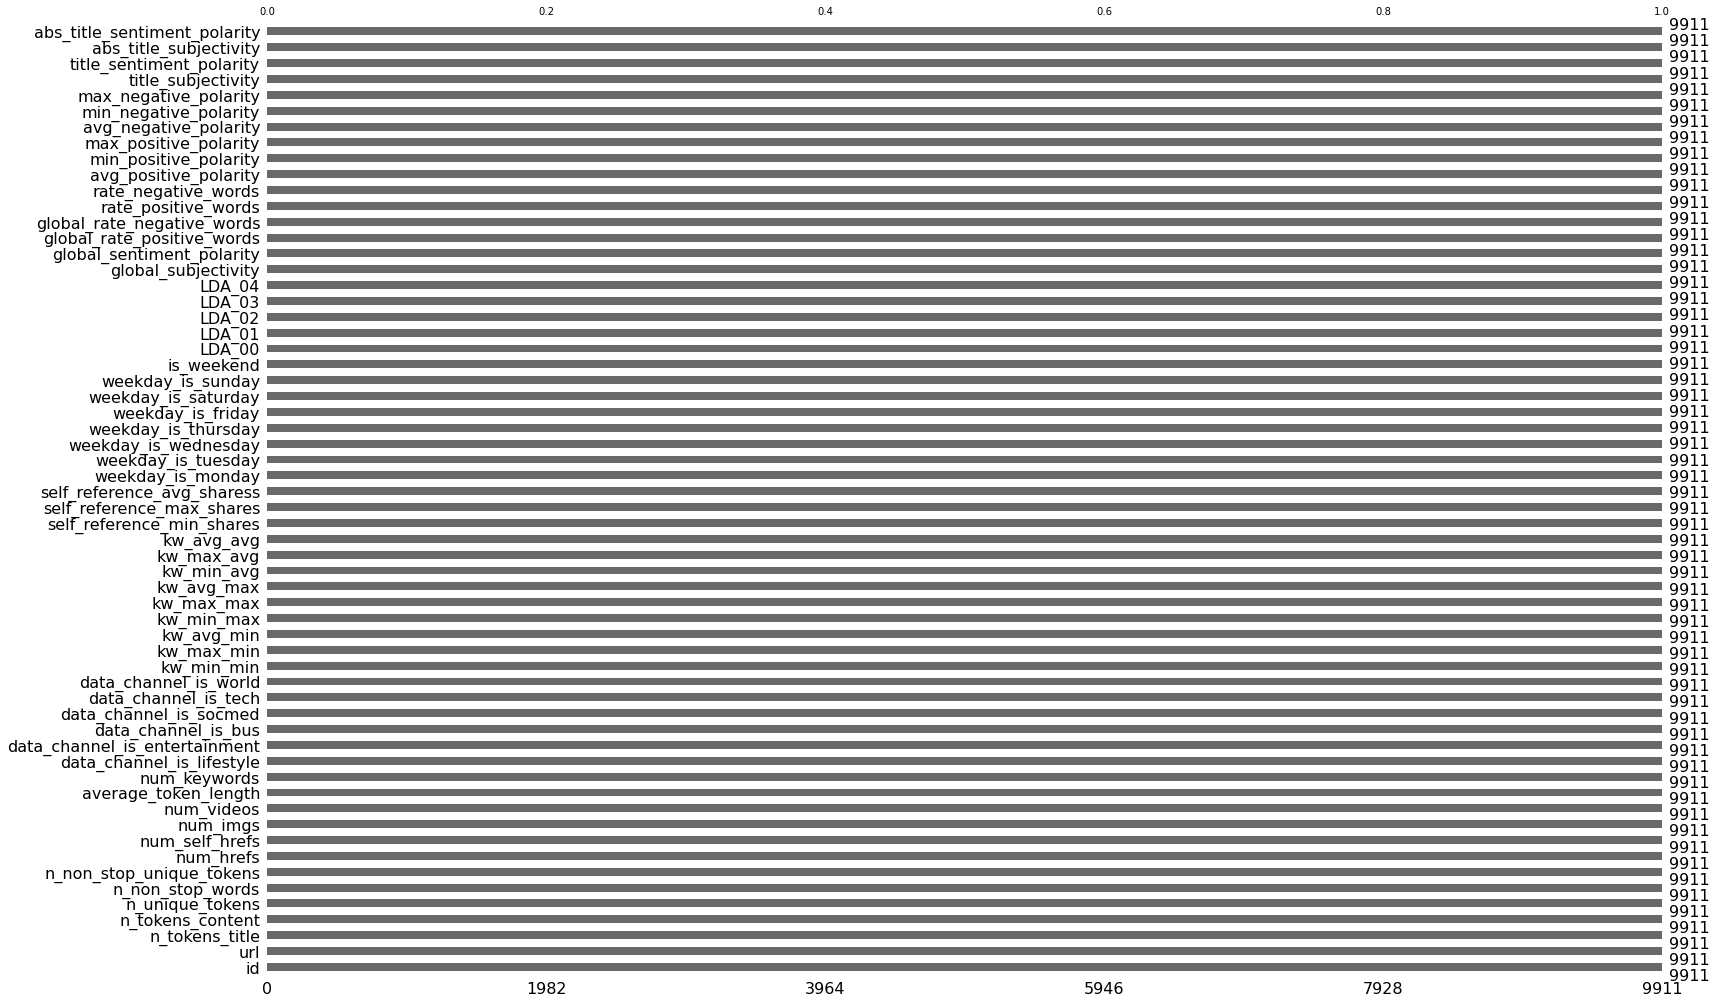

In [249]:
msno.bar(df_T)

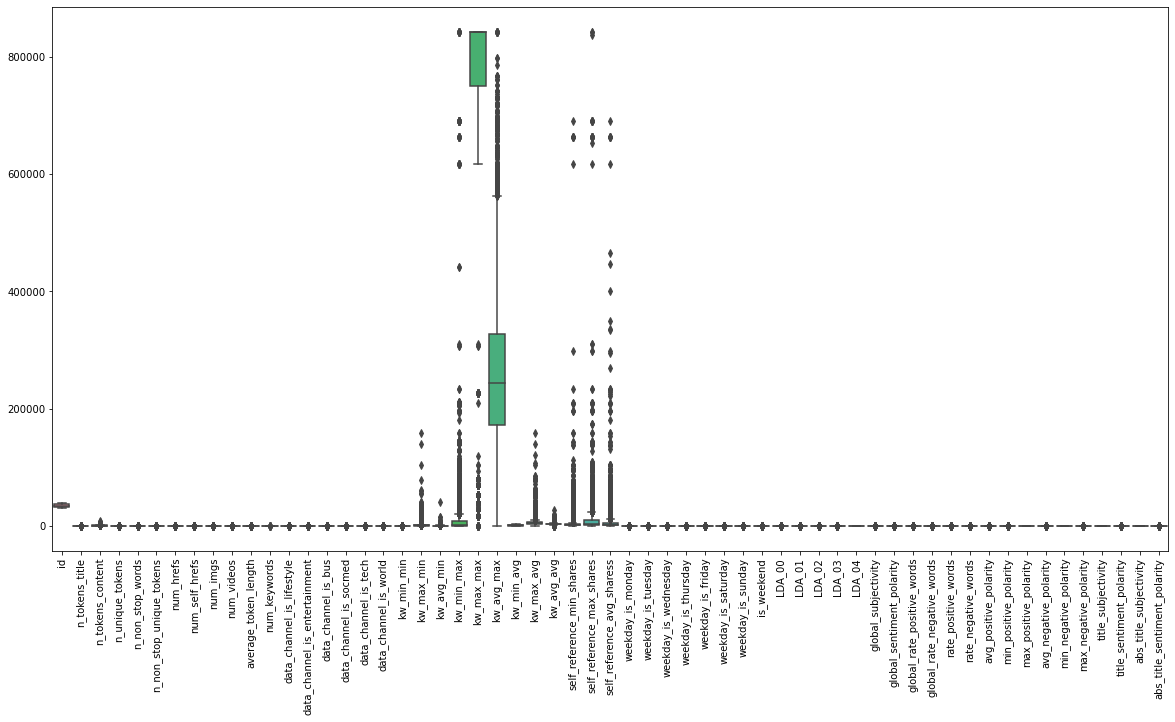

In [250]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data = df_T)
plt.show()

In [251]:
X_test_s= df_T[selected_features]

In [253]:
X_test_s.head()

id  n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0  29733            10.0             564.0         0.505618               1.0   
1  29734            12.0            1127.0         0.431298               1.0   
2  29735            10.0             400.0         0.564232               1.0   
3  29736            12.0             798.0         0.435279               1.0   
4  29737            11.0            1010.0         0.464503               1.0   

   n_non_stop_unique_tokens  average_token_length  num_imgs  num_videos  \
0                  0.637394              4.723404       0.0         3.0   
1                  0.621622              4.360248      11.0         0.0   
2                  0.698795              4.765000       1.0         1.0   
3                  0.613054              3.984962       3.0         1.0   
4                  0.611727              5.180198       1.0         0.0   

   weekday_is_monday  weekday_is_tuesday  weekday_is_wednesday  \
0                1.0                 0.0                   0.0   
1                0.0                 0.0                   0.0   
2                0.0                 0.0                   1.0   
3                0.0                 0.0                   0.0   
4                0.0                 0.0                   0.0   

   weekday_is_thursday  weekday_is_friday  weekday_is_saturday  \
0                  0.0                0.0                  0.0   
1                  1.0                0.0                  0.0   
2                  0.0                0.0                  0.0   
3                  1.0                0.0                  0.0   
4                  0.0                0.0                  0.0   

   weekday_is_sunday  is_weekend  data_channel_is_lifestyle  \
0                0.0         0.0                        0.0   
1                0.0         0.0                        0.0   
2                0.0         0.0                        0.0   
3                0.0         0.0                        0.0   
4                1.0         1.0                        0.0   

   data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  \
0                            0.0                  0.0                     0.0   
1                            0.0                  0.0                     0.0   
2                            1.0                  0.0                     0.0   
3                            1.0                  0.0                     0.0   
4                            0.0                  0.0                     0.0   

   data_channel_is_tech  data_channel_is_world  kw_min_min  kw_max_min  \
0                   0.0                    1.0        -1.0       442.0   
1                   1.0                    0.0        -1.0       733.0   
2                   0.0                    0.0        -1.0       784.0   
3                   0.0                    0.0        -1.0       796.0   
4                   0.0                    1.0        -1.0       269.0   

   kw_avg_min  kw_min_max  kw_max_max     kw_avg_max   kw_min_avg  \
0  128.000000     23700.0    843300.0  340780.000000  2154.061235   
1  254.875000      6300.0    843300.0  140325.000000  1671.078652   
2  283.285714      6800.0    843300.0  166071.428571  1828.500000   
3  284.222222      1800.0    843300.0  325322.222222  1059.333333   
4   91.714286         0.0    843300.0  214137.500000     0.000000   

    kw_max_avg   kw_avg_avg  num_keywords  num_hrefs  num_self_hrefs  \
0  3702.951220  2994.958581           5.0       21.0             1.0   
1  4040.166667  2704.175559           8.0       10.0             6.0   
2  3575.518291  2645.535689           7.0        1.0             0.0   
3  7735.494465  3966.507513           9.0        2.0             2.0   
4  3583.632001  2030.692327           8.0       32.0             2.0   

   self_reference_min_shares  self_reference_max_shares  \
0                     2300.0                2300.000000 

In [255]:
iD = X_test_s['id']
iD

0       29733
1       29734
2       29735
3       29736
4       29737
        ...  
9906    39639
9907    39640
9908    39641
9909    39642
9910    39643
Name: id, Length: 9911, dtype: int64

In [256]:
X_test_s.set_index('id',inplace=True)

In [258]:
X_test_s[:] =scale.transform(X_test_s)

In [259]:
X_test_s = X_test_s.apply(cap_outliers)

In [261]:
y_test_pred = ridge.predict(X_test_s[cols])

In [263]:
X_test_s['shares'] = y_test_pred

In [267]:
Sub = pd.DataFrame(X_test_s[['shares']],columns=['id','shares'])

In [273]:
X_test_s.reset_index(inplace=True)

In [275]:
Sub_df = X_test_s[['id','shares']]

In [282]:
X_test_s.drop('shares',axis=1,inplace=True)

In [277]:
Sub_df.to_csv('My_Ml_2_pred.csv',index=False)

In [279]:
X_test_s['shares'] = lr_final.predict(X_test_s[cols])

In [280]:
Sub_1 = X_test_s[['id','shares']]

In [281]:
Sub_1.to_csv('My_2_pred.csv',index=False)

In [283]:
X_test_s['shares'] = lasso.predict(X_test_s[cols])

In [288]:
Sub_2 = X_test_s[['id','shares']]
Sub_2.head()

id    shares
0  29733  7.354948
1  29734  7.573949
2  29735  7.060490
3  29736  7.483611
4  29737  7.353448

In [286]:
Sub_2.to_csv('My_1.csv',index=False)

 The top 10 Features that make a significant impact on shares are as listed below: 

In [331]:
k=imp_features.sort_values(by='value',ascending=False).head(10)

In [333]:
k.reset_index().drop('index',axis=1)

Imp_features     value
0                  kw_avg_avg  0.345142
1  self_reference_avg_sharess  0.172226
2                      LDA_00  0.127971
3   self_reference_min_shares  0.085931
4                      LDA_04  0.076875
5                   num_hrefs  0.058991
6                  kw_avg_min  0.058879
7         weekday_is_saturday  0.058444
8                  kw_min_min  0.054115
9         global_subjectivity  0.050737

The following suggestions can be made to the companies:

1.Try to use keywords for better impact on shares.

2.The referenced articles in mashable have a high chance of getting better shares.

3.Shares dont depend on the number of unique tokens or number of non stop words.

4.Shares have a good impact on weekends.

5.If the number of links increases shares do increase to extent but if the number of links increases beyond 100,shares dont have a major impact.